In [1]:
# Installing packages
!pip install watermark

In [2]:
# Import of libraries

# System libraries
import re
import string
import unicodedata
import itertools
from collections import Counter

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Jupyter Notebook: 3.10.14
Author: Library versions

pandas    : 2.2.3
watermark : 2.5.0
numpy     : 1.26.4
seaborn   : 0.12.2
re        : 2.2.1
platform  : 1.0.8
matplotlib: 3.7.5
plotly    : 5.22.0



In [3]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-imports-in-brazil/Coffee_Time Series.csv
/kaggle/input/coffee-imports-in-brazil/Brazilian Coffee Imports.xlsx


In [4]:
# Database

df1 = pd.read_csv("/kaggle/input/coffee-imports-in-brazil/Coffee_Time Series.csv")

df = pd.read_excel("/kaggle/input/coffee-imports-in-brazil/Brazilian Coffee Imports.xlsx")
df.head()

Year    Jan    Feb    Mar    Apr    May    Jun      Jul      Aug  \
0  1990-1990  26173  19159  27451  26171  28544  17922  26481.0  23562.0   
1  1991-1991  69158  61637  13725  34632  24989  23759  17966.0  37883.0   
2  1992-1992  50253  31072  37189  19353  21794  20417  21008.0  24640.0   
3  1993-1993  13190  11418  14598  14366  14519  14270  23104.0  25529.0   
4  1994-1994  33903  16803  19280   9066  12729  23110  33888.0  68407.0   

       Sep      Oct      Nov      Dec  
0  31341.0  43549.0  25242.0  50914.0  
1  34601.0  33082.0  35627.0  42152.0  
2  18008.0  16589.0  13101.0  18123.0  
3  30680.0  47624.0  20121.0  26978.0  
4  70732.0  56674.0  68528.0  61586.0

In [5]:
df1

Month Year  Value of Import
0       Jan-90            26173
1       Feb-90            19159
2       Mar-90            27451
3       Apr-90            26171
4       May-90            28544
..         ...              ...
385     Feb-22           177513
386     Mar-22           185460
387     Apr-22           197431
388     May-22           119075
389     Jun-22           181707

[390 rows x 2 columns]

In [6]:
# Display the first few rows of the dataset to understand its structure
df.head()

Year    Jan    Feb    Mar    Apr    May    Jun      Jul      Aug  \
0  1990-1990  26173  19159  27451  26171  28544  17922  26481.0  23562.0   
1  1991-1991  69158  61637  13725  34632  24989  23759  17966.0  37883.0   
2  1992-1992  50253  31072  37189  19353  21794  20417  21008.0  24640.0   
3  1993-1993  13190  11418  14598  14366  14519  14270  23104.0  25529.0   
4  1994-1994  33903  16803  19280   9066  12729  23110  33888.0  68407.0   

       Sep      Oct      Nov      Dec  
0  31341.0  43549.0  25242.0  50914.0  
1  34601.0  33082.0  35627.0  42152.0  
2  18008.0  16589.0  13101.0  18123.0  
3  30680.0  47624.0  20121.0  26978.0  
4  70732.0  56674.0  68528.0  61586.0

In [7]:
df.tail()

Year     Jan     Feb     Mar     Apr     May     Jun      Jul  \
28  2018-2018  105530   89840   75697   84533   87722   49841  66332.0   
29  2019-2019  114629   88723   89538   82875   95697   81569  87171.0   
30  2020-2020  101334   75836  106695   93733  122331   89794  66335.0   
31  2021-2021  109252  112305  115099   94671  118536  108001  81897.0   
32  2022-2022  146751  177513  185460  197431  119075  181707      NaN   

        Aug      Sep       Oct       Nov       Dec  
28  70738.0  82932.0   97611.0  118059.0  110440.0  
29  95533.0  96513.0   92604.0   99221.0  107555.0  
30  61715.0  87305.0  111782.0  115656.0  128823.0  
31  98620.0  85452.0  131631.0  120896.0  149556.0  
32      NaN      NaN       NaN       NaN       NaN

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    33 non-null     object 
 1   Jan     33 non-null     int64  
 2   Feb     33 non-null     int64  
 3   Mar     33 non-null     int64  
 4   Apr     33 non-null     int64  
 5   May     33 non-null     int64  
 6   Jun     33 non-null     int64  
 7   Jul     32 non-null     float64
 8   Aug     32 non-null     float64
 9   Sep     32 non-null     float64
 10  Oct     32 non-null     float64
 11  Nov     32 non-null     float64
 12  Dec     32 non-null     float64
dtypes: float64(6), int64(6), object(1)
memory usage: 3.5+ KB


In [9]:
df.dtypes

Year     object
Jan       int64
Feb       int64
Mar       int64
Apr       int64
May       int64
Jun       int64
Jul     float64
Aug     float64
Sep     float64
Oct     float64
Nov     float64
Dec     float64
dtype: object

In [10]:
# Check the first few rows of the 'Year' column to understand the format
print(df['Year'].unique())

['1990-1990' '1991-1991' '1992-1992' '1993-1993' '1994-1994' '1995-1995'
 '1996-1996' '1997-1997' '1998-1998' '1999-1999' '2000-2000' '2001-2001'
 '2002-2002' '2003-2003' '2004-2004' '2005-2005' '2006-2006' '2007-2007'
 '2008-2008' '2009-2009' '2010-2010' '2011-2011' '2012-2012' '2013-2013'
 '2014-2014' '2015-2015' '2016-2016' '2017-2017' '2018-2018' '2019-2019'
 '2020-2020' '2021-2021' '2022-2022']


In [11]:
# Extract the first four digits (the actual year) from the 'Year' column
df['Year'] = df['Year'].str[:4]

# Convert the 'Year' column to a datetime object
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Set 'Year' as the index for time series analysis
df.set_index('Year', inplace=True)

In [12]:
# Convert the 'Month Year' column to a datetime object
df1['Month Year'] = pd.to_datetime(df1['Month Year'], format='%b-%y')

# Set 'Month Year' as the index for time series analysis
df1.set_index('Month Year', inplace=True)

df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 390 entries, 1990-01-01 to 2022-06-01
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Value of Import  390 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33 entries, 1990-01-01 to 2022-01-01
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Jan     33 non-null     int64  
 1   Feb     33 non-null     int64  
 2   Mar     33 non-null     int64  
 3   Apr     33 non-null     int64  
 4   May     33 non-null     int64  
 5   Jun     33 non-null     int64  
 6   Jul     32 non-null     float64
 7   Aug     32 non-null     float64
 8   Sep     32 non-null     float64
 9   Oct     32 non-null     float64
 10  Nov     32 non-null     float64
 11  Dec     32 non-null     float64
dtypes: float64(6), int64(6)
memory usage: 3.4 KB


# EDA

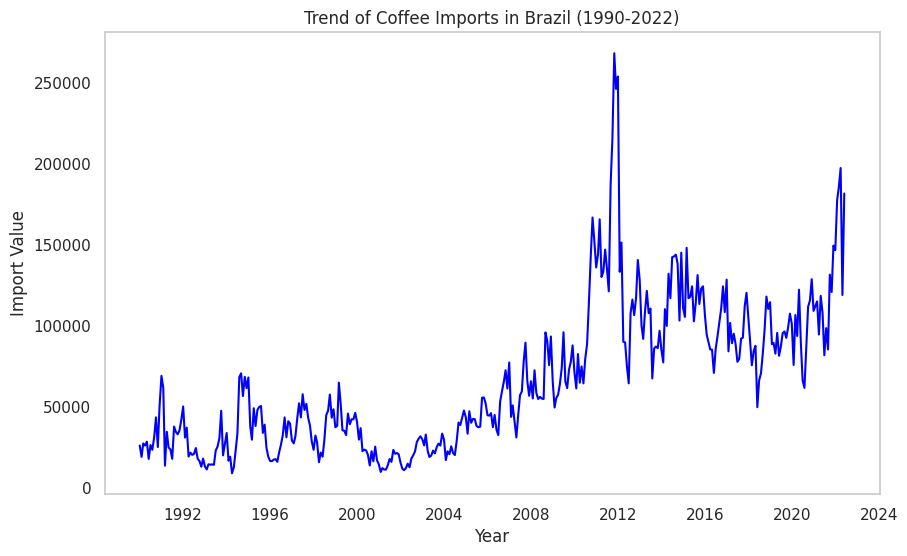

In [14]:
# Plot the trend of coffee imports over time
plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1['Value of Import'], color='blue')
plt.title('Trend of Coffee Imports in Brazil (1990-2022)')
plt.xlabel('Year')
plt.ylabel('Import Value')
plt.grid(False)
plt.show()

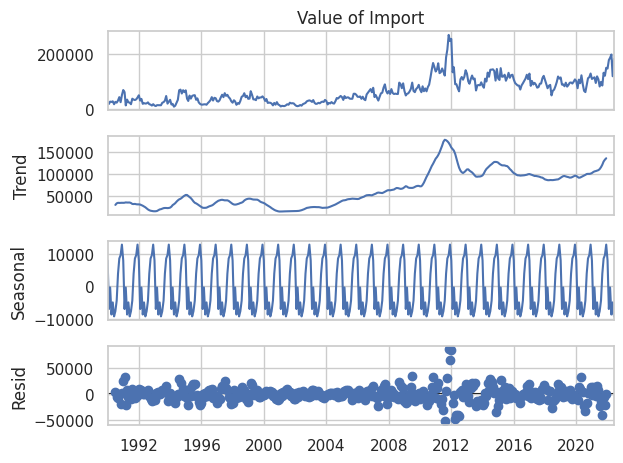

In [15]:
# Seasonal Decomposition (optional but useful for time series analysis)
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(df1['Value of Import'], model='additive', period=12)
decomposition.plot()
plt.show()

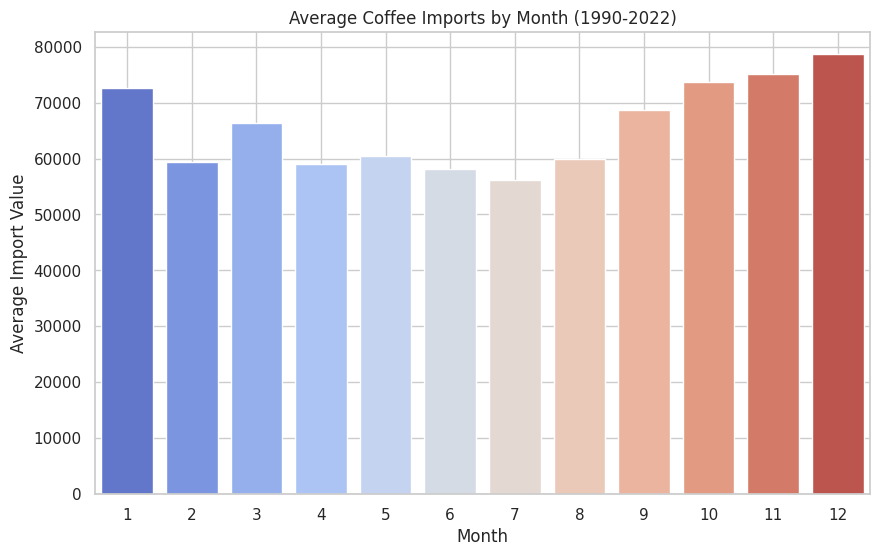

In [16]:
# Monthly trends: Analyzing seasonality in coffee imports
df1['Month'] = df1.index.month

# Group by month and calculate the average import value per month
monthly_avg = df1.groupby('Month')['Value of Import'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='coolwarm')
plt.title('Average Coffee Imports by Month (1990-2022)')
plt.xlabel('Month')
plt.ylabel('Average Import Value')
plt.grid(True)
plt.show()

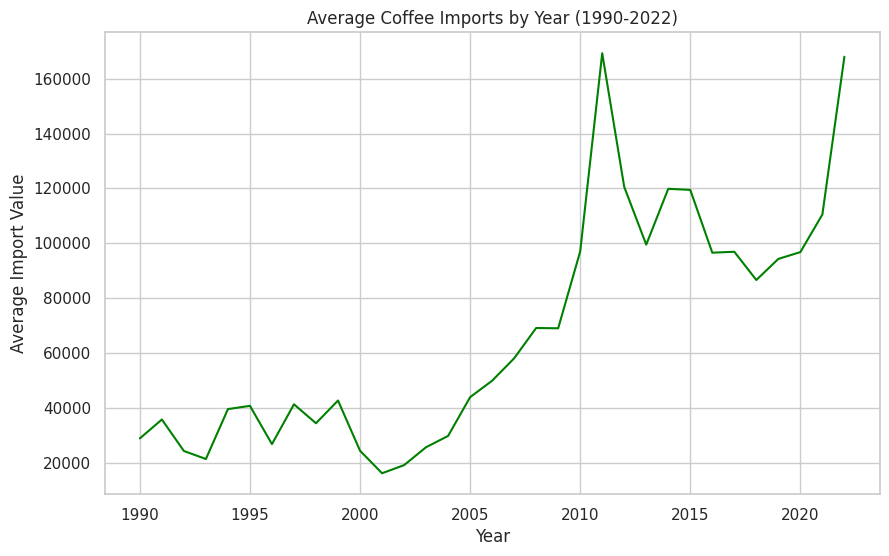

In [17]:
# Check for yearly trends
df1['Year'] = df1.index.year
yearly_avg = df1.groupby('Year')['Value of Import'].mean()

plt.figure(figsize=(10, 6))
plt.plot(yearly_avg.index, yearly_avg.values, color='green')
plt.title('Average Coffee Imports by Year (1990-2022)')
plt.xlabel('Year')
plt.ylabel('Average Import Value')
plt.grid(True)
plt.show()

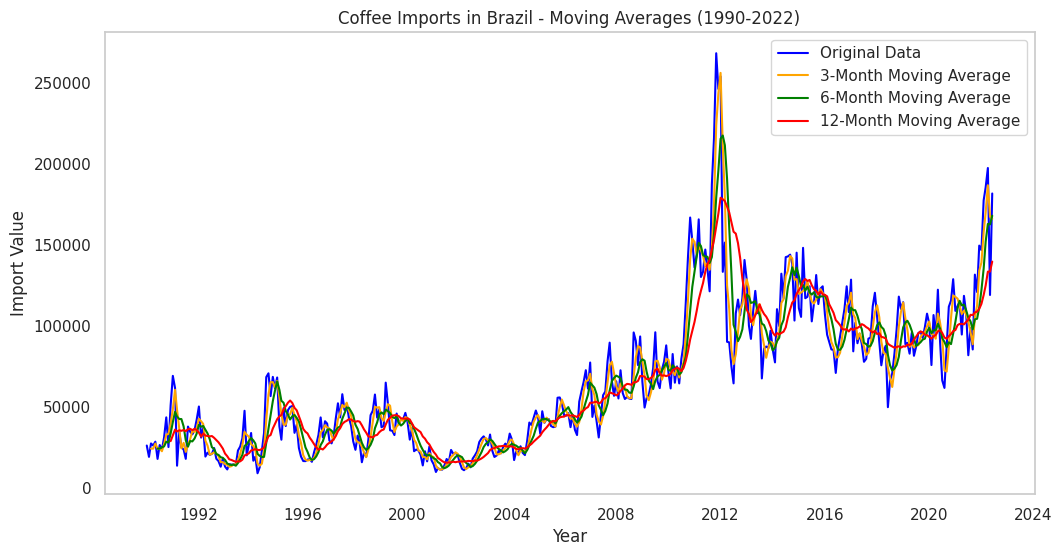

In [18]:
# Calculate the Simple Moving Average (SMA) with different window sizes
df1['SMA_3'] = df1['Value of Import'].rolling(window=3).mean()  # 3-month moving average
df1['SMA_6'] = df1['Value of Import'].rolling(window=6).mean()  # 6-month moving average
df1['SMA_12'] = df1['Value of Import'].rolling(window=12).mean()  # 12-month moving average

# Plot the original data and the moving averages
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['Value of Import'], label='Original Data', color='blue')
plt.plot(df1.index, df1['SMA_3'], label='3-Month Moving Average', color='orange')
plt.plot(df1.index, df1['SMA_6'], label='6-Month Moving Average', color='green')
plt.plot(df1.index, df1['SMA_12'], label='12-Month Moving Average', color='red')

# Add titles and labels
plt.title('Coffee Imports in Brazil - Moving Averages (1990-2022)')
plt.xlabel('Year')
plt.ylabel('Import Value')
plt.legend()
plt.grid(False)
plt.show()

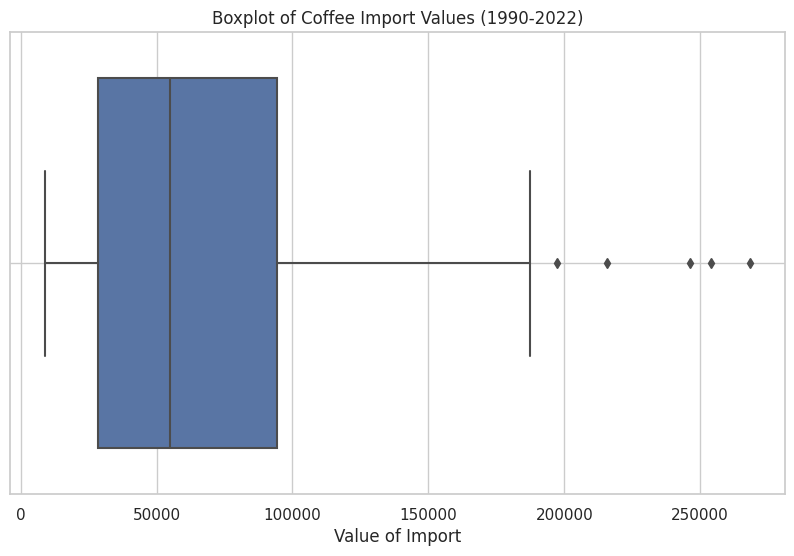

In [19]:
# 3. Outlier Detection: Boxplot to detect outliers in the import values
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['Value of Import'])
plt.title('Boxplot of Coffee Import Values (1990-2022)')
plt.grid(True)
plt.show()

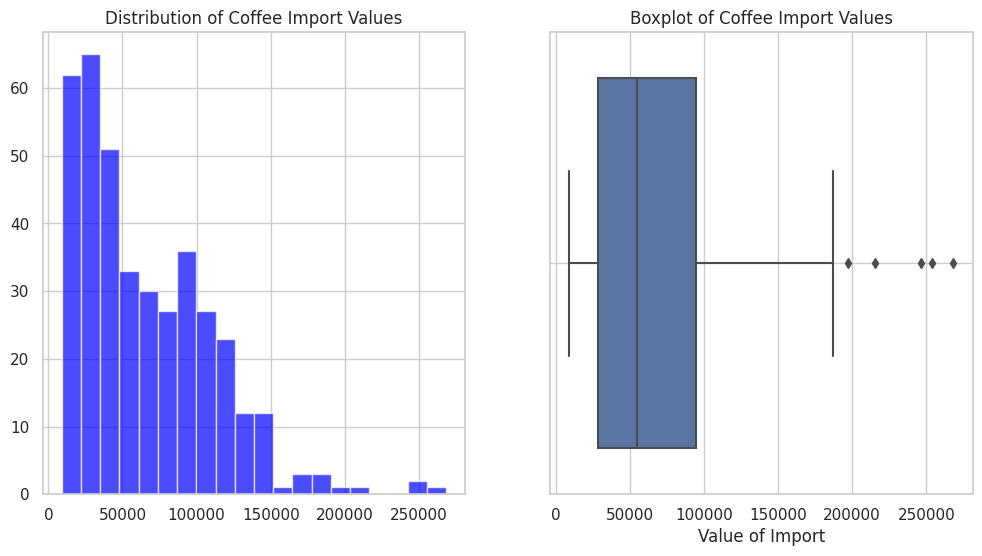

In [20]:
# 6. Distribution of Coffee Import Values: Histogram and boxplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df1['Value of Import'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Coffee Import Values')

plt.subplot(1, 2, 2)
sns.boxplot(x=df1['Value of Import'])
plt.title('Boxplot of Coffee Import Values')
plt.grid(True)
plt.show()

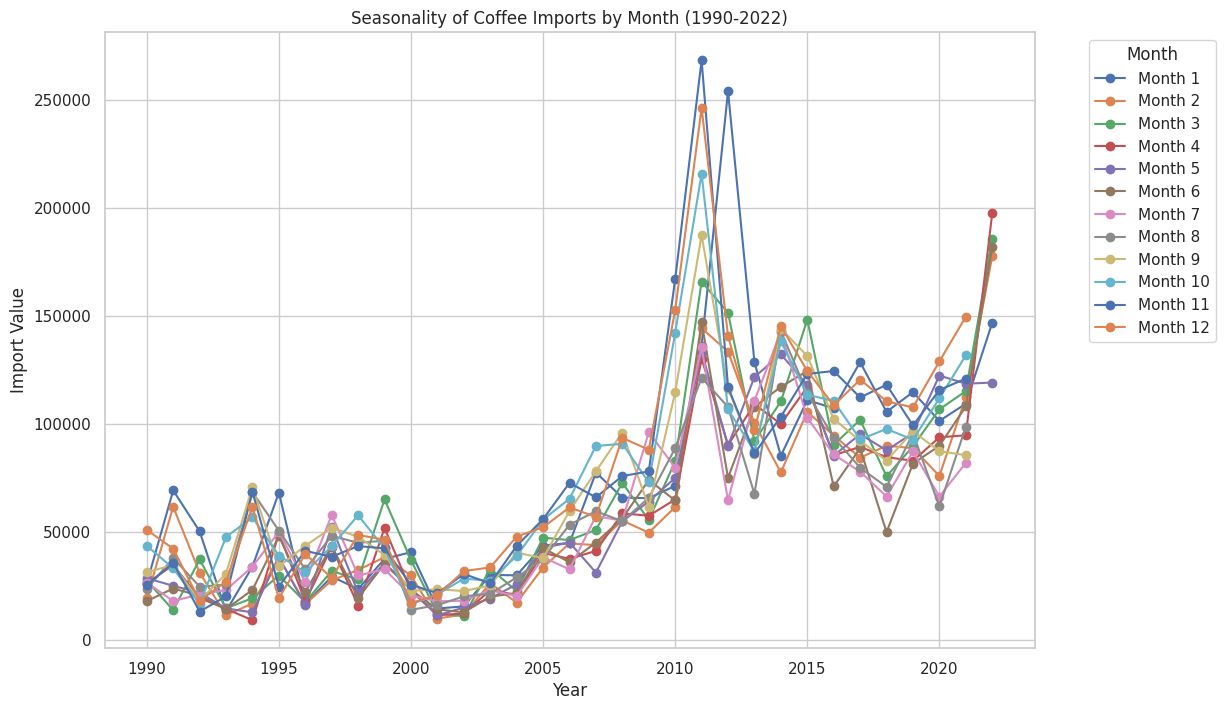

In [21]:
# Create a 'Month' and 'Year' column
df1['Month'] = df1.index.month
df1['Year'] = df1.index.year

# Plotting the average import value for each month over the years
plt.figure(figsize=(12, 8))
for i in range(1, 13):
    monthly_data = df1[df1['Month'] == i]
    plt.plot(monthly_data['Year'], monthly_data['Value of Import'], label=f'Month {i}', marker='o')

plt.title('Seasonality of Coffee Imports by Month (1990-2022)')
plt.xlabel('Year')
plt.ylabel('Import Value')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

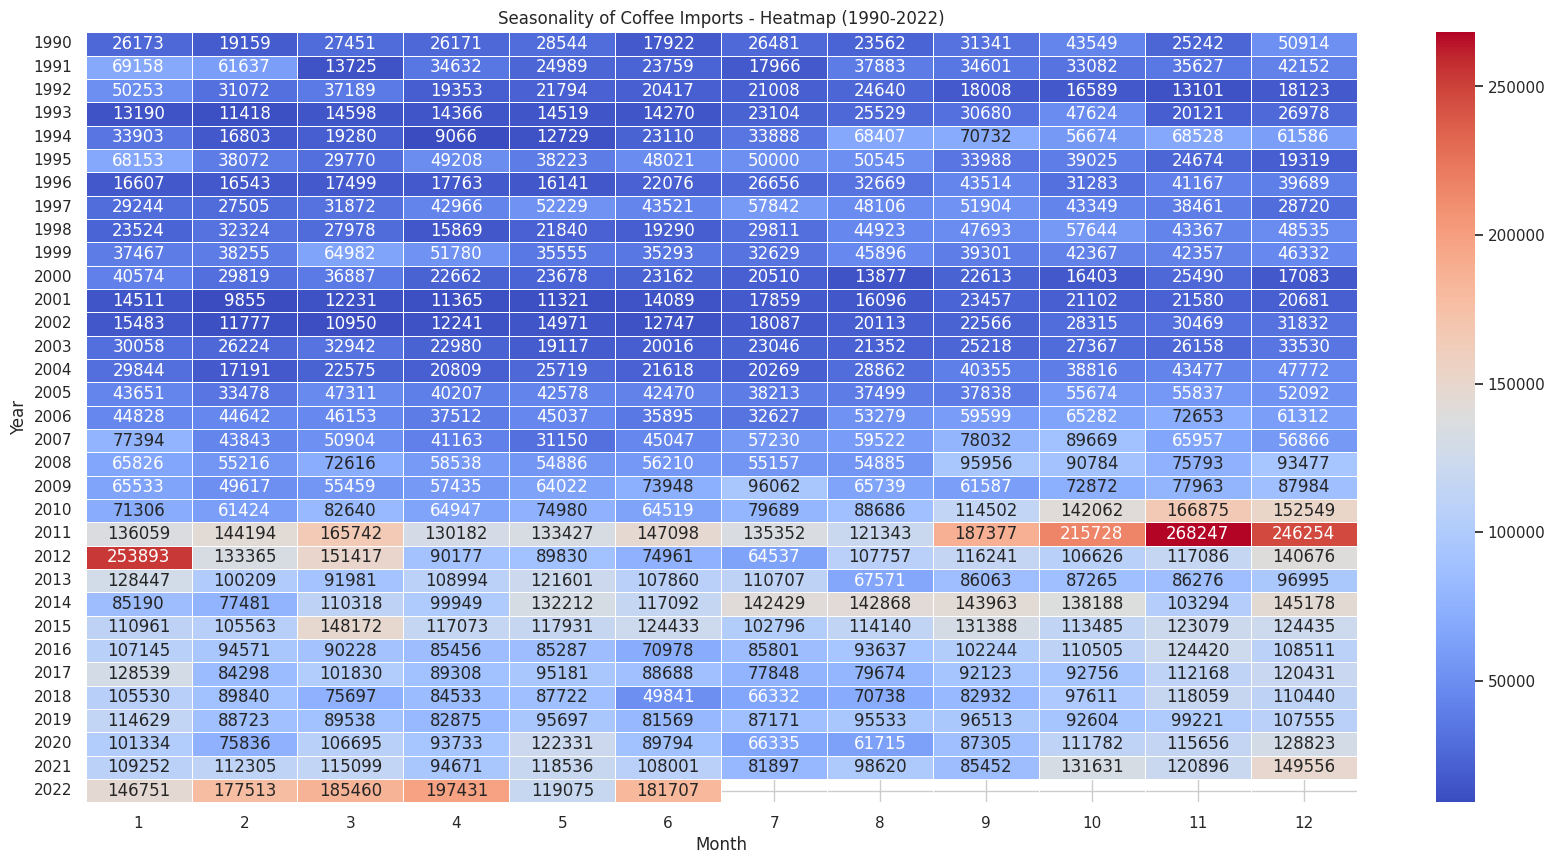

In [22]:
# Create a pivot table to rearrange data for the heatmap
pivot_table = df1.pivot_table(values='Value of Import', index='Year', columns='Month', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(20.5, 10))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".0f", linewidths=.5)
plt.title('Seasonality of Coffee Imports - Heatmap (1990-2022)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

# Feature engineering

In [23]:
# Feature engineering: Create 'Month' and 'Year' features for the model
df1['Month'] = df1.index.month
df1['Year'] = df1.index.year

# Training and testing division

In [24]:
# Define the features (X) and the target variable (y)
X = df1[['Month', 'Year']]  # We can use 'Month' and 'Year' as features for simplicity
y = df1['Value of Import']  # The target variable is the 'Value of Import'

In [25]:
X.shape

(390, 2)

In [26]:
y.shape

(390,)

# Model training

In [27]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Section 1) GPU regression machine learning models

# Machine learning models - Linear regression

# Model 1 - XGBoost

In [28]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Initialize XGBRegressor with GPU parameters
xgboost_model = XGBRegressor(
    objective='reg:squarederror',  # Objective for regression
    n_estimators=1000,             # Increase the number of trees (epochs) for monitoring
    learning_rate=0.1,             # Learning rate (step size shrinkage)
    max_depth=6,                   # Maximum depth of each tree (controls model complexity)
    subsample=0.8,                 # Subsample ratio of training instances
    colsample_bytree=0.8,          # Subsample ratio of features when constructing each tree
    gamma=0,                       # Minimum loss reduction required to make a split
    reg_alpha=0.01,                # L1 regularization (Lasso)
    reg_lambda=1,                  # L2 regularization (Ridge)
    min_child_weight=1,            # Minimum sum of instance weight needed in a child node
    booster='gbtree',              # Use tree-based boosters (default)
    random_state=42,               # Seed for reproducibility
    verbosity=1,                   # Verbosity level of model training output (set to 1 for warnings)
    tree_method='gpu_hist',        # Use GPU for training with the histogram-based method
    predictor='gpu_predictor'      # Use GPU for predictions (optional)
)

# Define evaluation set
eval_set = [(X_train, y_train), (X_test, y_test)]

# Train the model with evaluation metric and early stopping
xgboost_model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse",                  # Metric to be monitored
    eval_set=eval_set,                   # Evaluation set for monitoring
    early_stopping_rounds=10,            # Stop if no improvement after 10 rounds
    verbose=True                         # Output training information at each epoch
)

[0]	validation_0-rmse:42994.69287	validation_1-rmse:34252.13565
[1]	validation_0-rmse:39928.76347	validation_1-rmse:31287.85579
[2]	validation_0-rmse:39754.52333	validation_1-rmse:31340.02078
[3]	validation_0-rmse:39587.76761	validation_1-rmse:31395.56983
[4]	validation_0-rmse:36730.41445	validation_1-rmse:28645.00712
[5]	validation_0-rmse:34288.11959	validation_1-rmse:26286.78159
[6]	validation_0-rmse:32142.68282	validation_1-rmse:24194.72344
[7]	validation_0-rmse:30337.46847	validation_1-rmse:22513.06638
[8]	validation_0-rmse:28696.25344	validation_1-rmse:20899.81646
[9]	validation_0-rmse:28532.92612	validation_1-rmse:20848.90283
[10]	validation_0-rmse:27056.54505	validation_1-rmse:19542.17801
[11]	validation_0-rmse:26928.67392	validation_1-rmse:19504.96955
[12]	validation_0-rmse:25773.60148	validation_1-rmse:18439.04917
[13]	validation_0-rmse:25654.19804	validation_1-rmse:18423.74797
[14]	validation_0-rmse:24542.67782	validation_1-rmse:17494.46090
[15]	validation_0-rmse:24415.78245	

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, predictor='gpu_predictor', ...)

In [29]:
# Make predictions on the test set
y_pred = xgboost_model.predict(X_test)

In [30]:
# Calculate residuals
residuals = y_test - y_pred

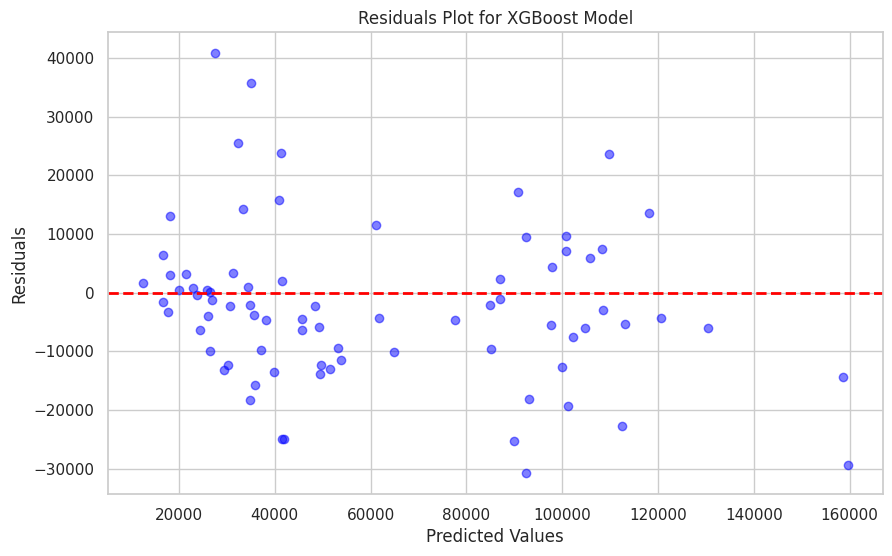

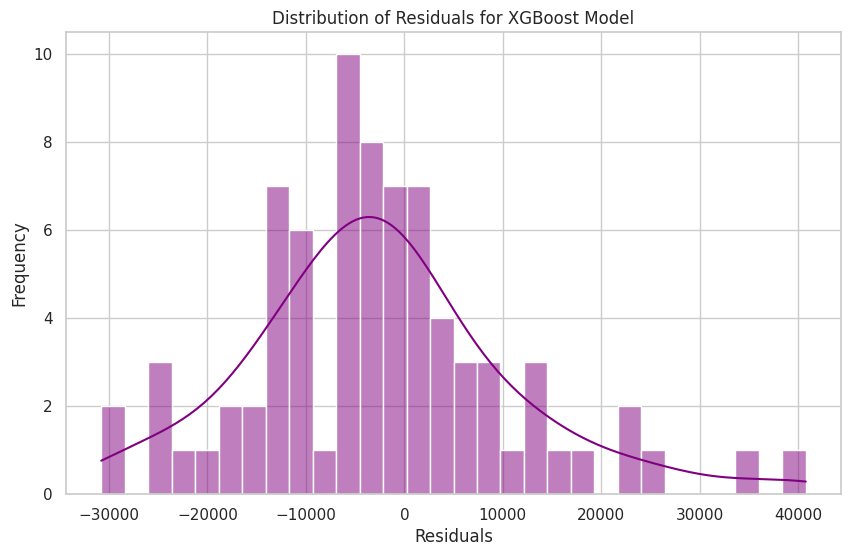

In [31]:
# Plot residuals scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot for XGBoost Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Plot distribution of residuals (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title('Distribution of Residuals for XGBoost Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [32]:
# Generate future dates for the next 12 months (1 year of forecasting)
future_dates = pd.date_range(start=df1.index[-1], periods=20, freq='M')[1:]

# Create a new DataFrame for the future months and year
future_df = pd.DataFrame({'Month': future_dates.month,
                          'Year': future_dates.year})

# Predict future coffee import values
future_predictions = xgboost_model.predict(future_df)
future_predictions

array([152099.88, 155562.03, 163031.89, 168915.94, 171263.42, 174036.97,
       167088.34, 152097.7 , 158543.69, 153093.66, 154953.38, 151680.75,
       152099.88, 155562.03, 163031.89, 168915.94, 171263.42, 174036.97,
       167088.34], dtype=float32)

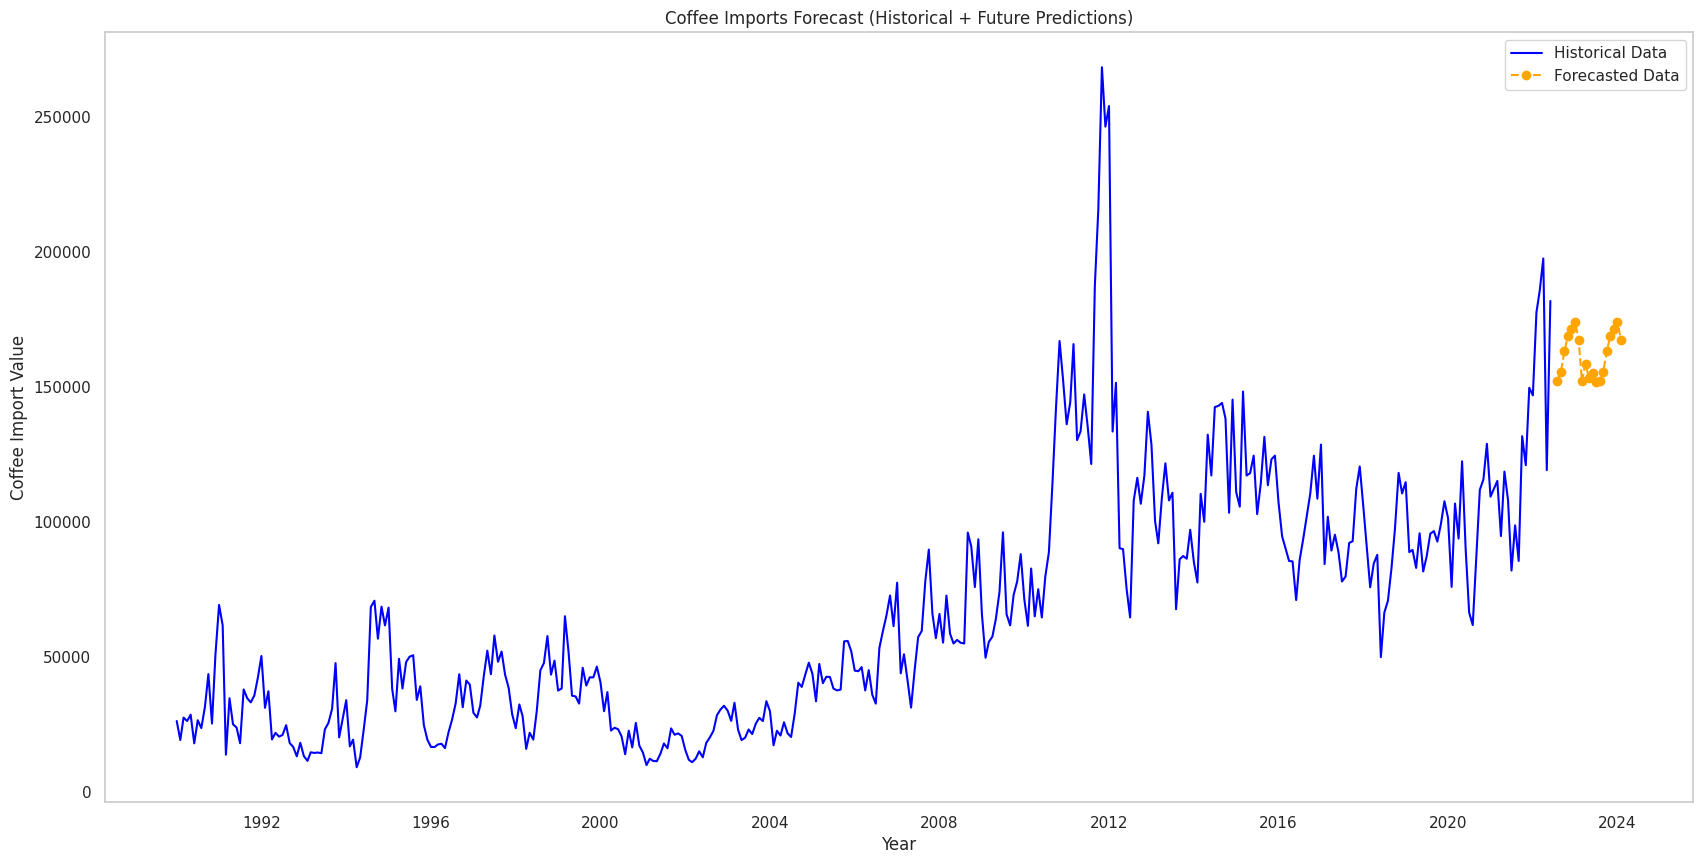

In [33]:
# 2. Plot Historical Data and Forecasted Data

plt.figure(figsize=(20.5, 10))

# Plot historical data
plt.plot(df1.index, df1['Value of Import'], label='Historical Data', color='blue')

# Plot forecasted future data
plt.plot(future_dates, future_predictions, label='Forecasted Data', color='orange', linestyle='--', marker='o')

# Adding labels and title
plt.title('Coffee Imports Forecast (Historical + Future Predictions)')
plt.xlabel('Year')
plt.ylabel('Coffee Import Value')
plt.legend()
plt.grid(False)
plt.show()

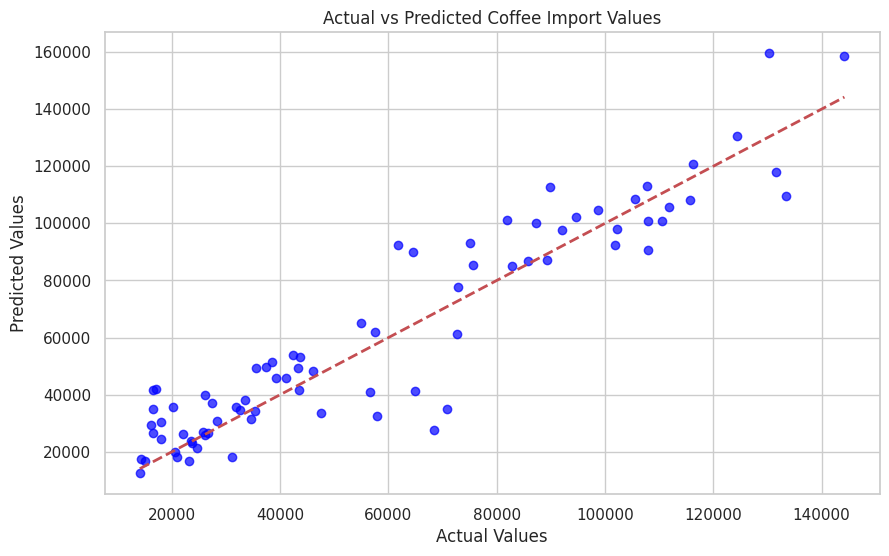

In [34]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Coffee Import Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model name (you can adjust this to reflect the actual model used)
model_name = 'XGBoost'

# Predict values using the trained model
y_pred = xgboost_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Organize the metrics into a dictionary with the model name
metrics = {
    'Model': [model_name],  # Name of the model
    'RMSE': [rmse],         # Root Mean Squared Error
    'MAE': [mae],           # Mean Absolute Error
    'MSE': [mse],           # Mean Squared Error
    'R²': [r2]              # R-squared (coefficient of determination)
}

# Convert the dictionary into a DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame with the metrics
metrics_df

Model          RMSE           MAE           MSE       R²
0  XGBoost  13565.529033  10230.091346  1.840236e+08  0.86303

# Modelo 2 - LightGBM GPU

In [36]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

# Initialize LightGBM with GPU parameters
lgb_model = lgb.LGBMRegressor(
    objective='regression',          # Objective for regression
    n_estimators=1000,               # Number of trees (iterations)
    learning_rate=0.1,               # Learning rate
    max_depth=6,                     # Maximum depth of trees
    subsample=0.8,                   # Subsampling for the rows
    colsample_bytree=0.8,            # Subsampling for the columns
    reg_alpha=0.01,                  # L1 regularization
    reg_lambda=1,                    # L2 regularization
    min_child_weight=1,              # Minimum sum of instance weight in a child
    device='gpu',                    # Use GPU for training
    random_state=42                  # For reproducibility
)

# Define evaluation set (training and validation sets)
eval_set = [(X_train, y_train), (X_test, y_test)]

# Train the LightGBM model with epoch tracking and early stopping
lgb_model.fit(
    X_train, 
    y_train, 
    eval_set=eval_set,                # Set of data to evaluate performance
    eval_metric='rmse'               # Evaluation metric: Root Mean Squared Error (RMSE)
)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 312, number of used features: 2
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...


1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 2 dense feature groups (0.00 MB) transferred to GPU in 0.002375 secs. 0 sparse feature groups
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 67374.253205
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

LGBMRegressor(colsample_bytree=0.8, device='gpu', max_depth=6,
              min_child_weight=1, n_estimators=1000, objective='regression',
              random_state=42, reg_alpha=0.01, reg_lambda=1, subsample=0.8)

In [37]:
# Predict on the test set
y_pred_lgb = lgb_model.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [38]:
# Calculate residuals
residuals_lgb = y_test - y_pred_lgb

In [39]:
# Get feature importances from the trained LightGBM model
feature_importances = lgb_model.feature_importances_

# Assuming your feature names are stored in a list (e.g., if X_train is a DataFrame)
feature_names = X_train.columns

# Create a DataFrame to organize feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

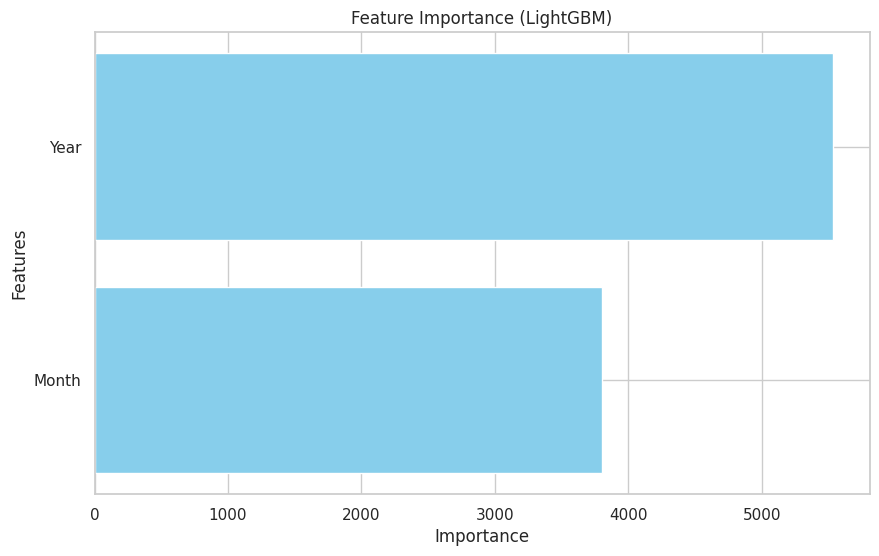

In [40]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance (LightGBM)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.grid(True)
plt.show()

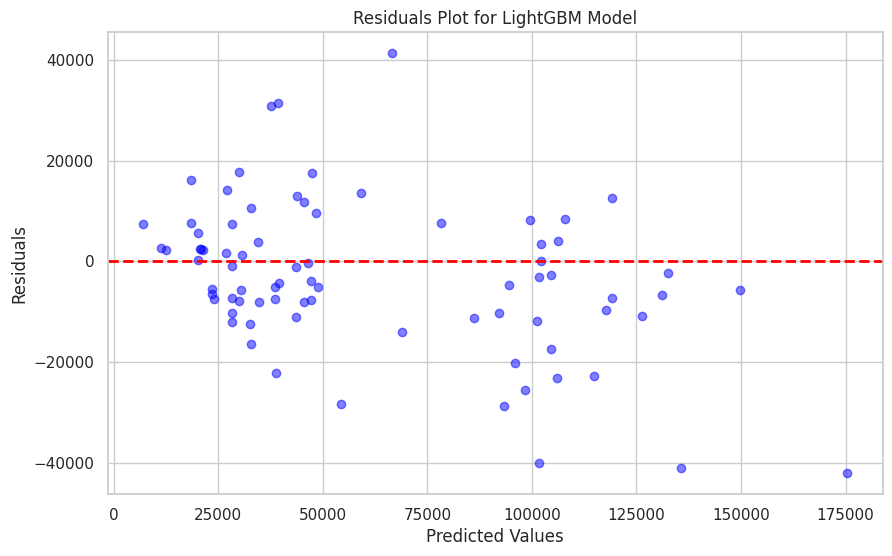

In [41]:
# Plot residuals scatter plot (Residuals vs Predicted)
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lgb, residuals_lgb, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot for LightGBM Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

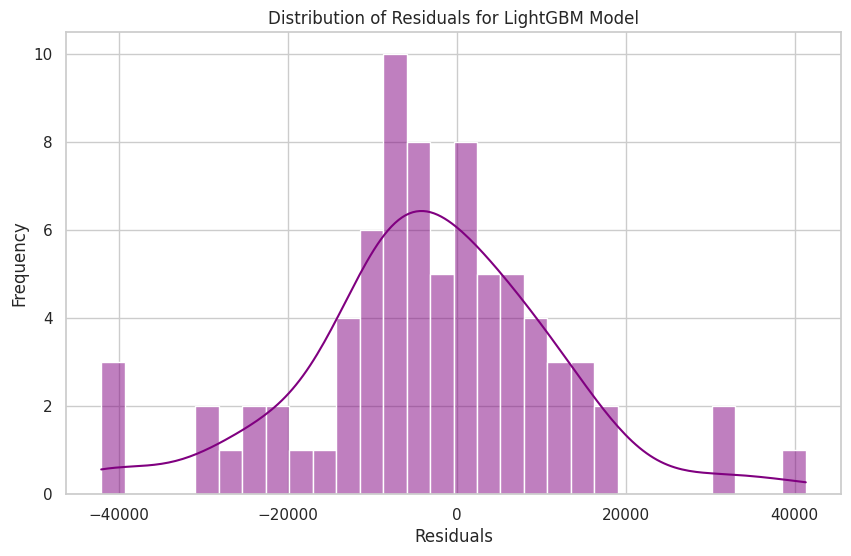

In [42]:
# Plot distribution of residuals (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(residuals_lgb, bins=30, kde=True, color='purple')
plt.title('Distribution of Residuals for LightGBM Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

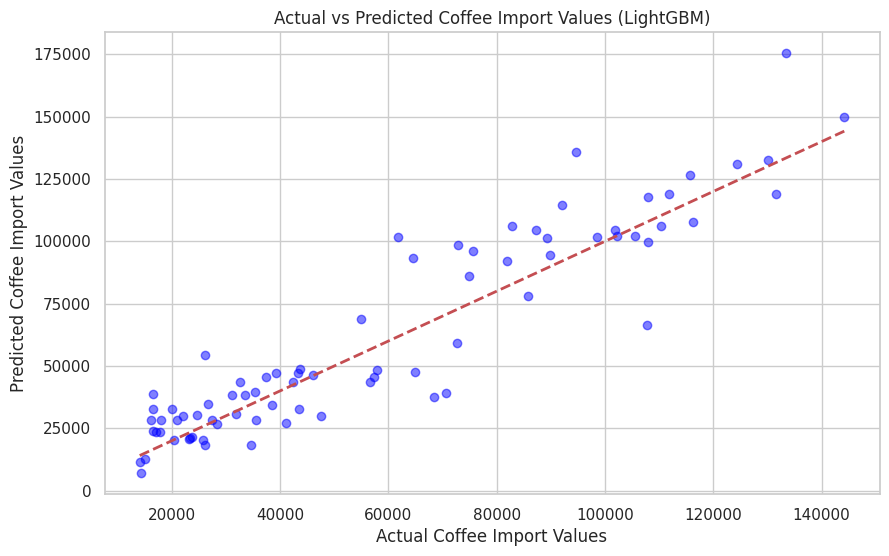

In [43]:
# Plot Actual vs Predicted values using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lgb, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Add 45-degree reference line

# Add labels and title
plt.title('Actual vs Predicted Coffee Import Values (LightGBM)')
plt.xlabel('Actual Coffee Import Values')
plt.ylabel('Predicted Coffee Import Values')
plt.grid(True)
plt.show()

In [44]:
# Calculate metrics
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

# Create DataFrame with metrics
metrics_lgb = {
               'Model': ['LightGBM'],
               'RMSE': [rmse_lgb],
               'MAE': [mae_lgb],
               'MSE': [mse_lgb],
               'R²': [r2_lgb]
              }

# Convert dictionary to DataFrame
metrics_lgb_df = pd.DataFrame(metrics_lgb)

# Display the DataFrame
metrics_lgb_df

Model          RMSE           MAE           MSE        R²
0  LightGBM  15186.863845  11352.057272  2.306408e+08  0.828332

# Machine learning models - Linear regression bagging boosting

In [45]:
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Define the models to be tested
# Define the models to be tested with `verbose=-1` to suppress warnings for LightGBM
models = {'CatBoost': CatBoostRegressor(verbose=0, n_estimators=100, learning_rate=0.1),
          'DecisionTree': DecisionTreeRegressor(),
          'RandomForest': RandomForestRegressor(n_estimators=100),
          'GradientBoosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
}

# Loop through each model, fit, and predict
for model_name, model in models.items():
    print(f'Training {model_name}...')
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Output just to indicate that the model was trained and predictions were made
    print(f'{model_name} model trained and predictions made.')

Training CatBoost...
CatBoost model trained and predictions made.
Training DecisionTree...
DecisionTree model trained and predictions made.
Training RandomForest...
RandomForest model trained and predictions made.
Training GradientBoosting...
GradientBoosting model trained and predictions made.


In [46]:
# Generate future dates for the next 12 months (assuming future forecasting)
future_dates = pd.date_range(start=df1.index[-1], periods=13, freq='M')[1:]
future_dates

DatetimeIndex(['2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31',
               '2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28',
               '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30'],
              dtype='datetime64[ns]', freq='ME')

Training CatBoost...


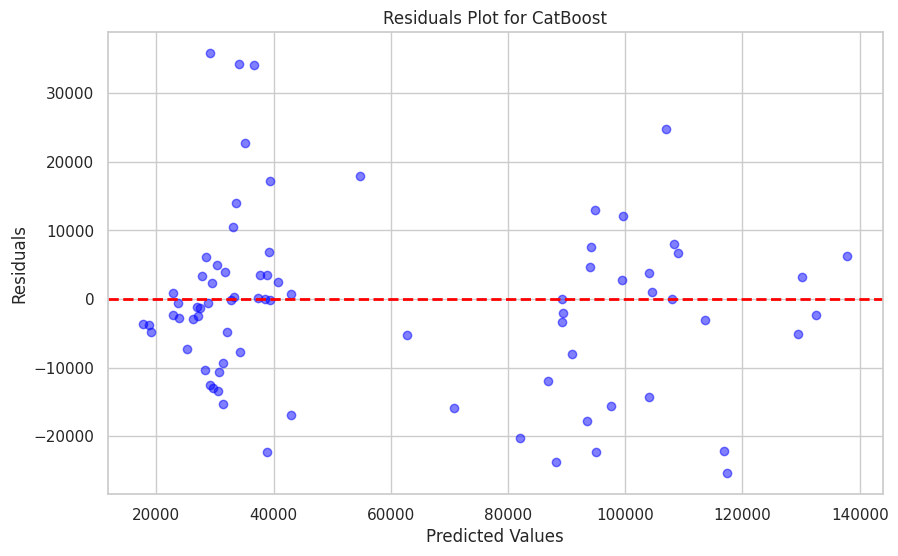

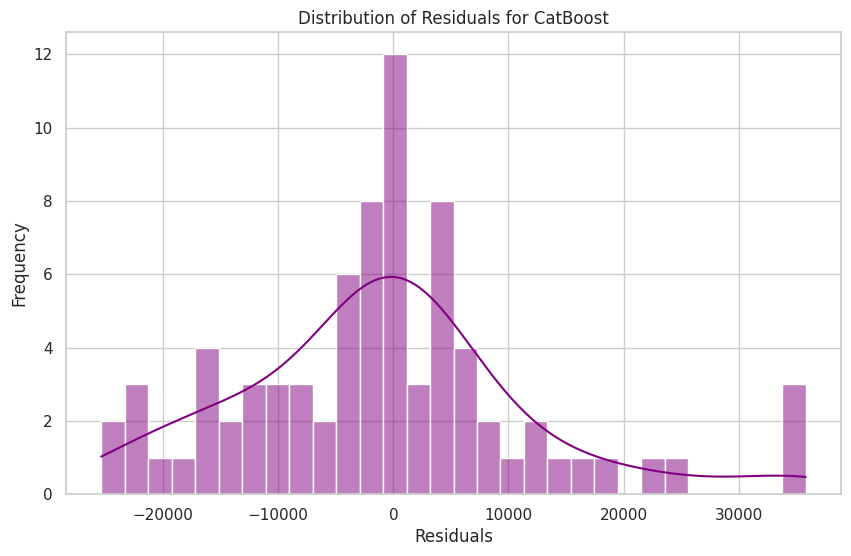

Training DecisionTree...


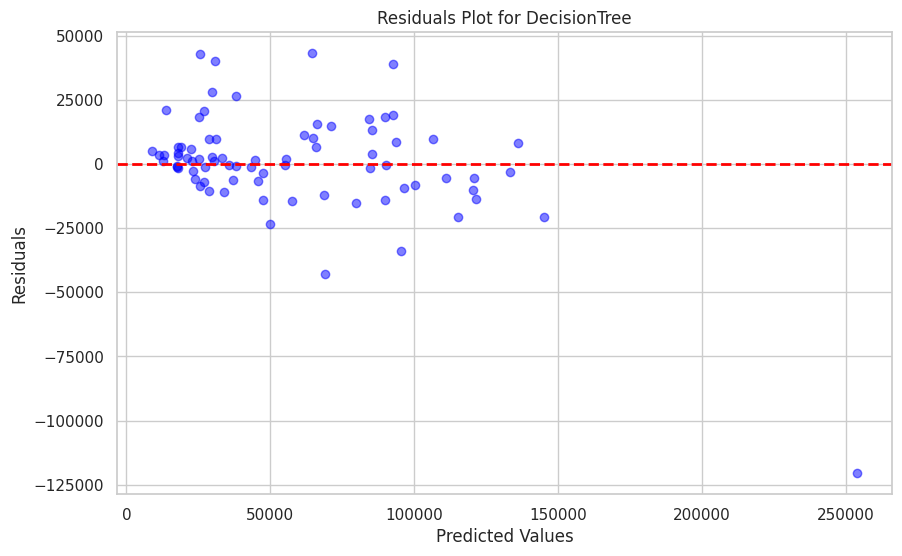

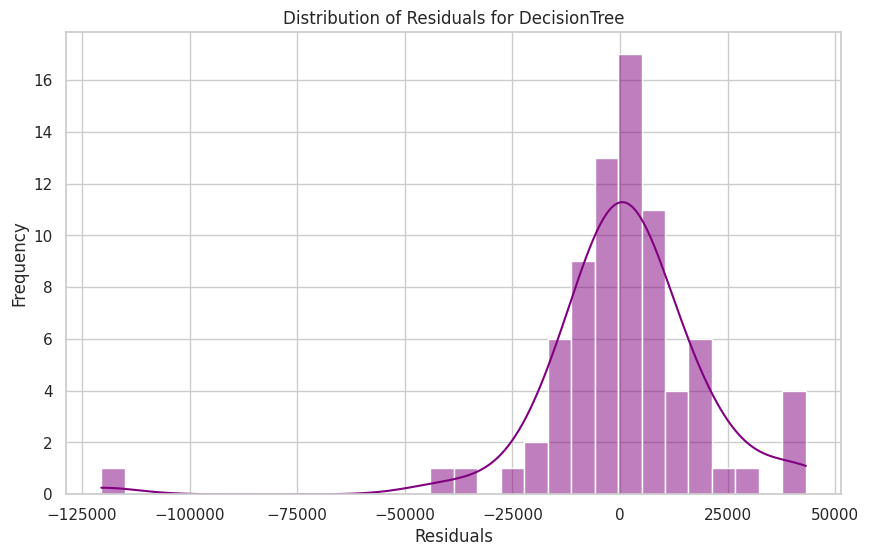

Training RandomForest...


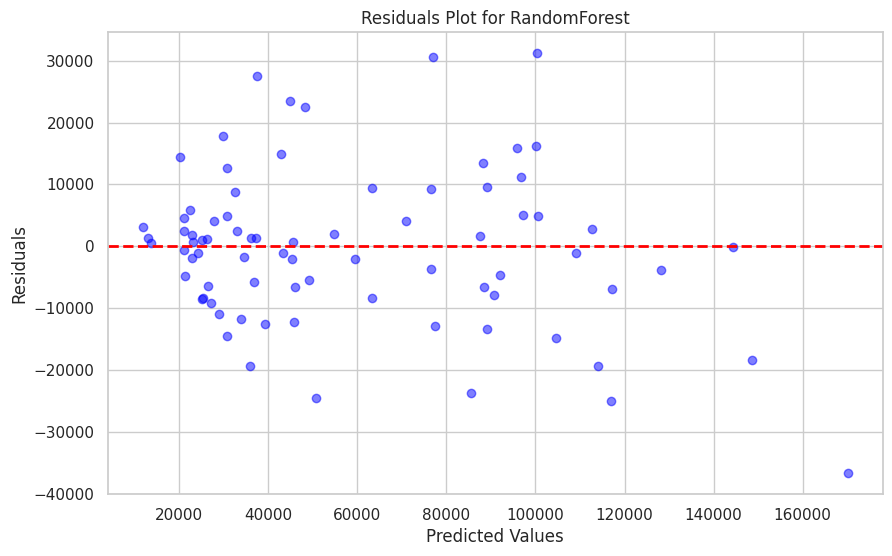

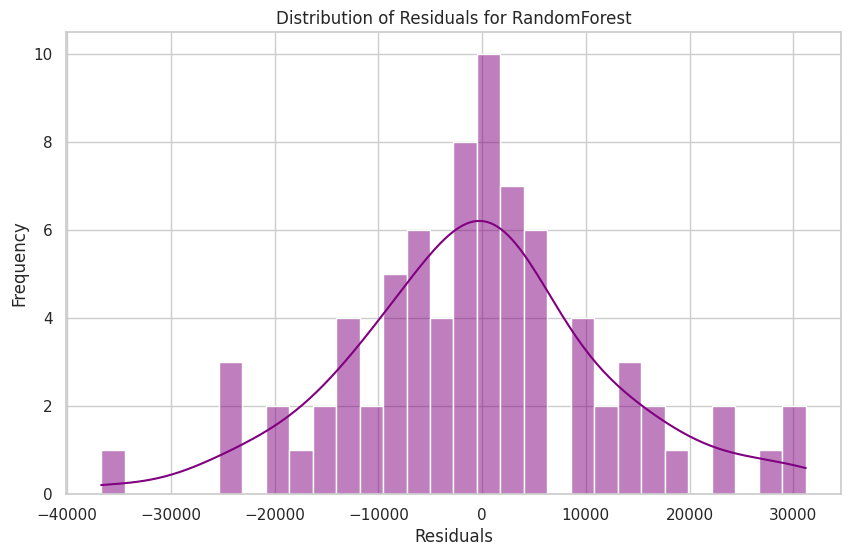

Training GradientBoosting...


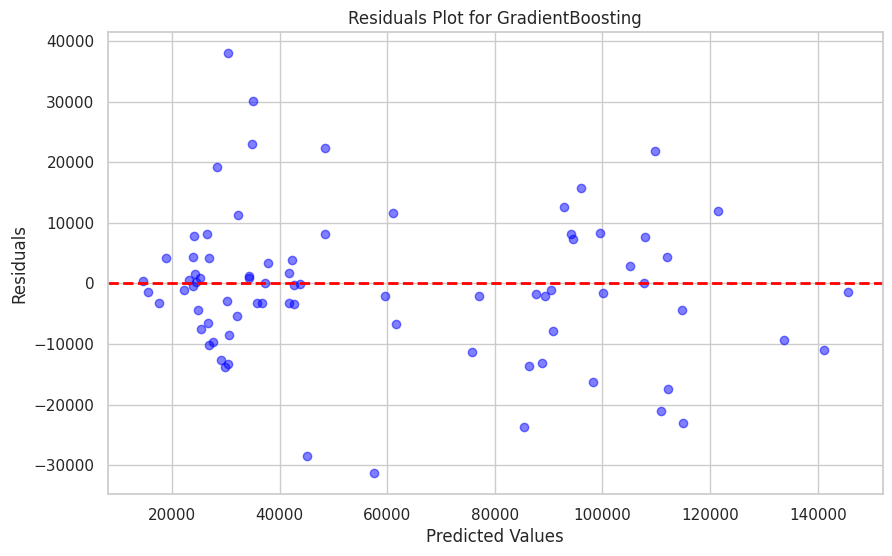

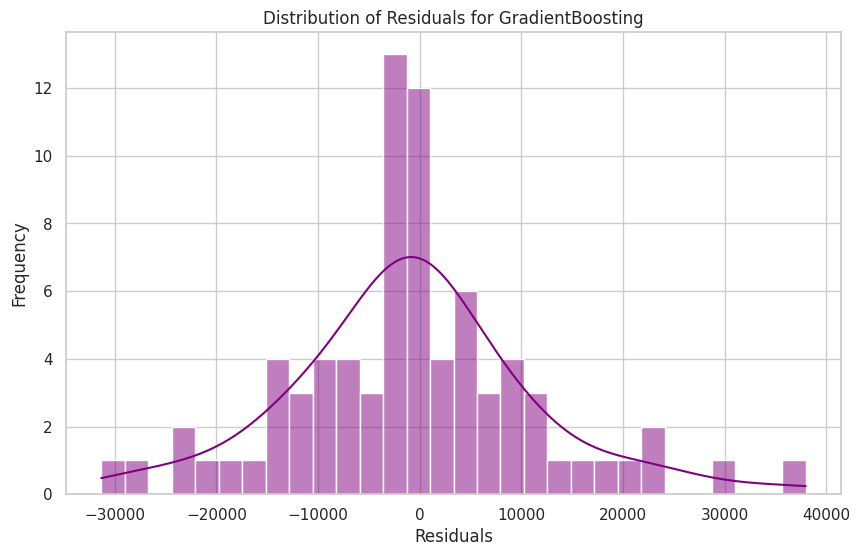

In [47]:
# Loop through each model, fit, predict, and plot residuals
for model_name, model in models.items():
    print(f'Training {model_name}...')
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate residuals
    residuals = y_test - y_pred
    
    # Plot the residuals
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.title(f'Residuals Plot for {model_name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.show()

    # Optionally, you can also plot the distribution of residuals
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, bins=30, kde=True, color='purple')
    plt.title(f'Distribution of Residuals for {model_name}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Training CatBoost...


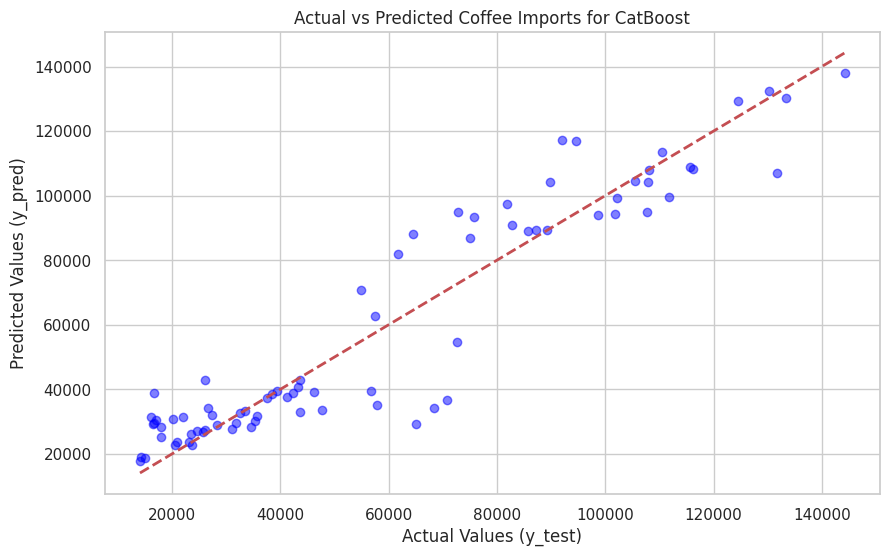

Training DecisionTree...


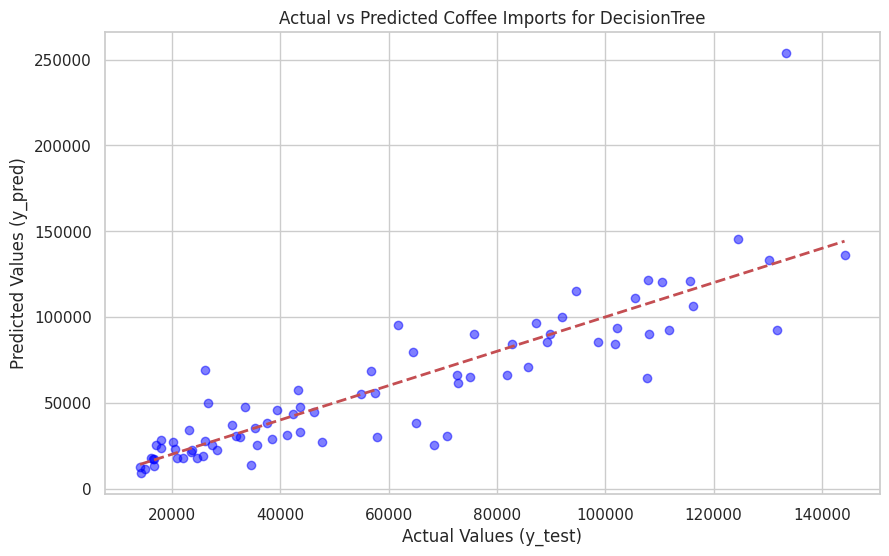

Training RandomForest...


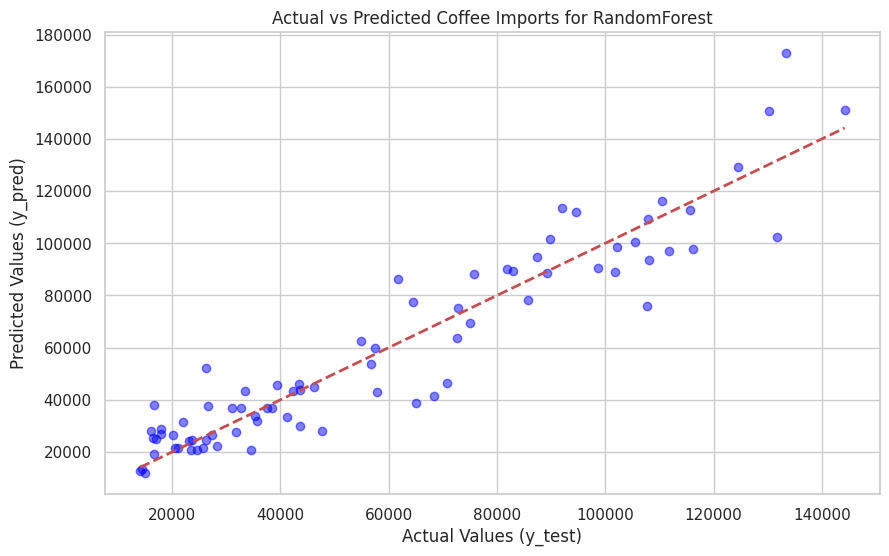

Training GradientBoosting...


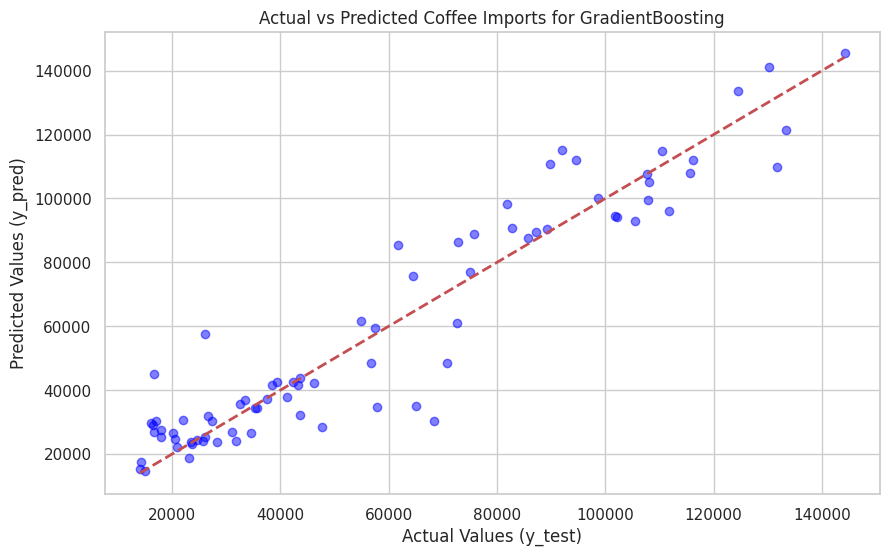

In [48]:
# Loop through each model, fit, predict, and plot Actual vs Predicted
for model_name, model in models.items():
    print(f'Training {model_name}...')
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
    plt.title(f'Actual vs Predicted Coffee Imports for {model_name}')
    plt.xlabel('Actual Values (y_test)')
    plt.ylabel('Predicted Values (y_pred)')
    plt.grid(True)
    plt.show()

Training CatBoost...


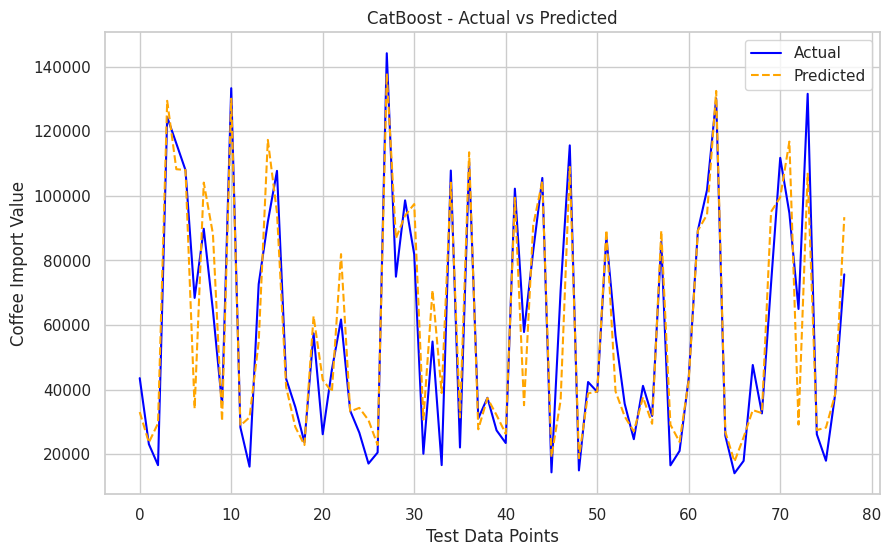

Training DecisionTree...


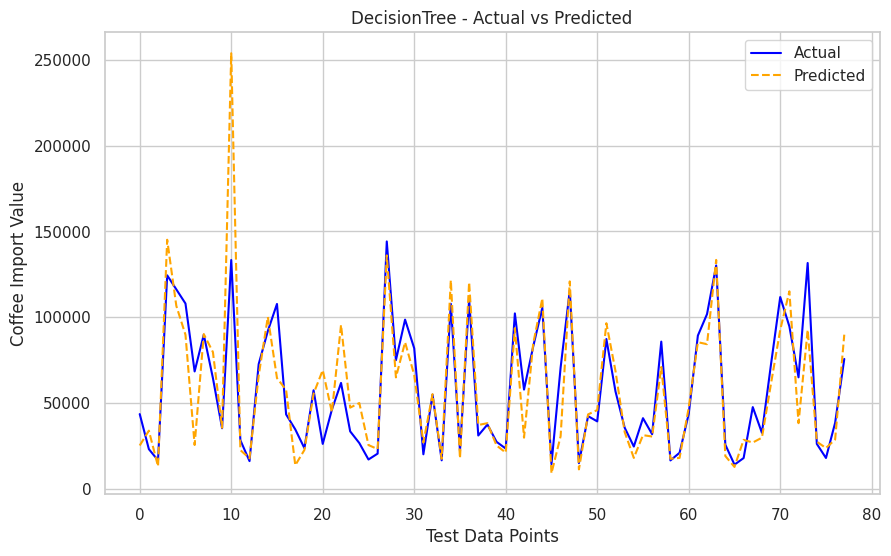

Training RandomForest...


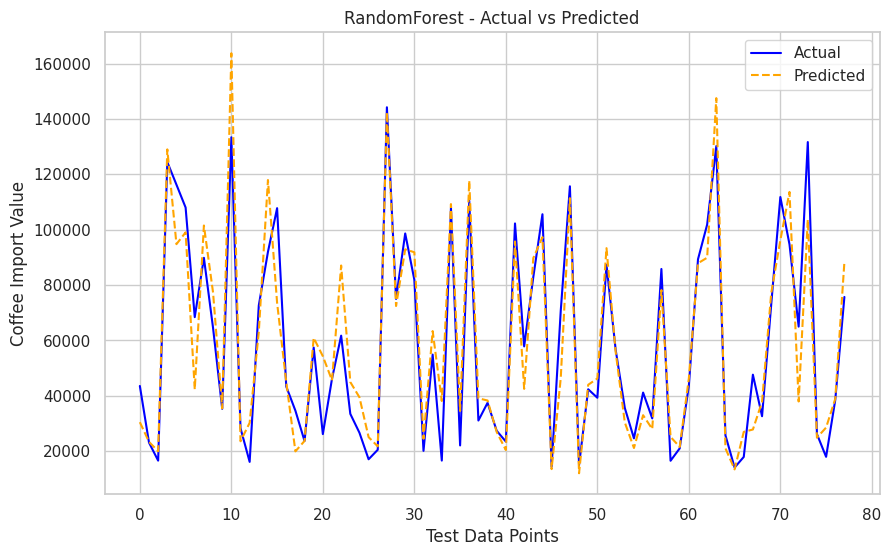

Training GradientBoosting...


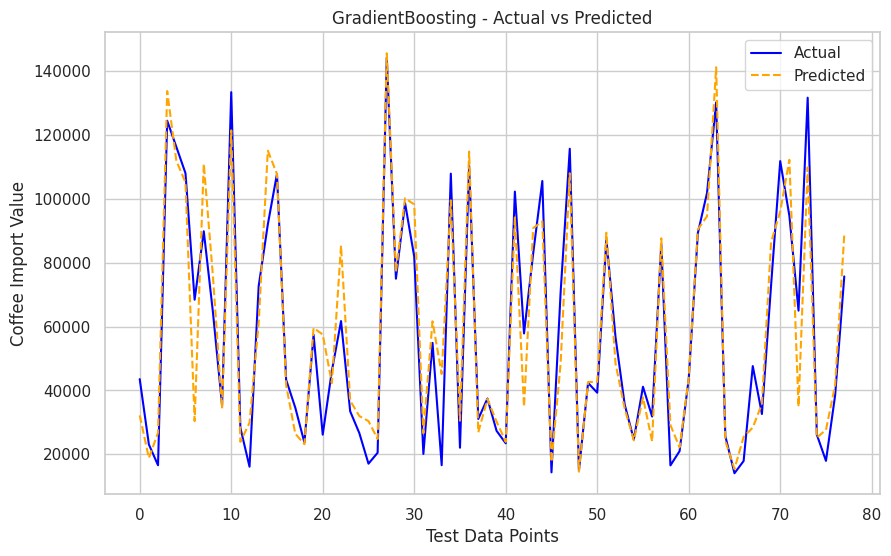

In [49]:
# Loop through each model, fit, predict, and plot
for model_name, model in models.items():
    print(f'Training {model_name}...')
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual', color='blue')
    plt.plot(y_pred, label='Predicted', color='orange', linestyle='--')
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.xlabel('Test Data Points')
    plt.ylabel('Coffee Import Value')
    plt.legend()
    plt.grid(True)
    plt.show()

Training CatBoost...


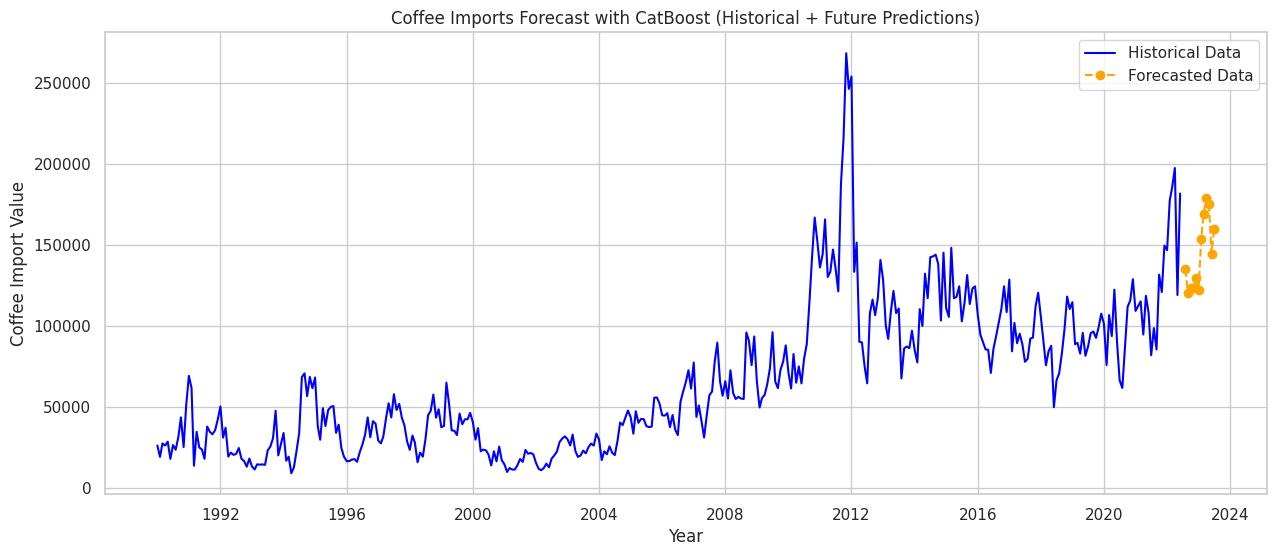

Training DecisionTree...


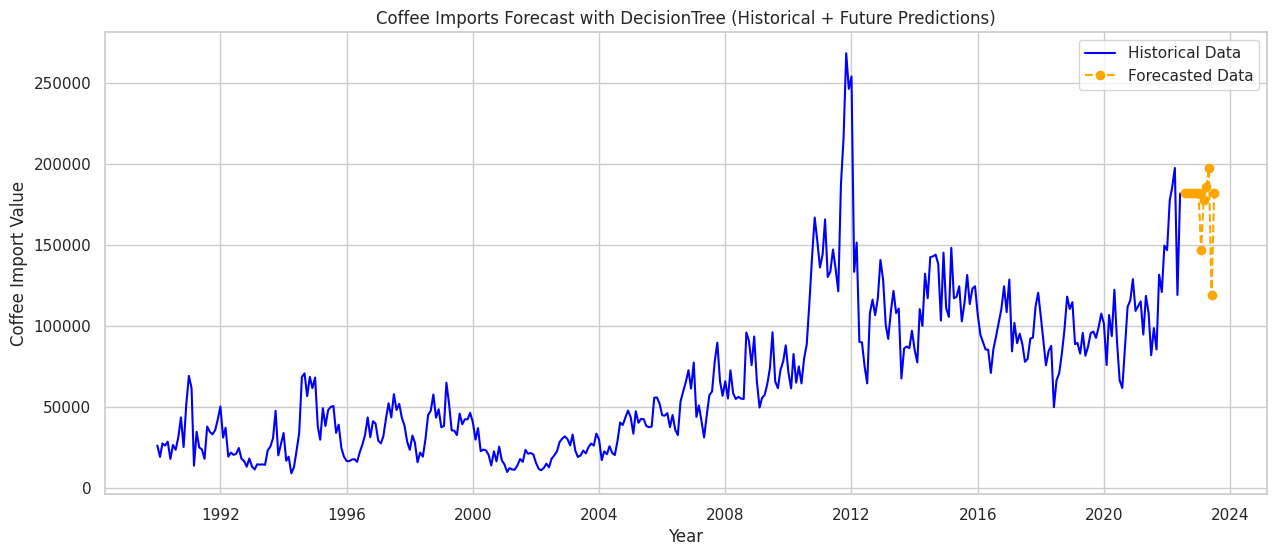

Training RandomForest...


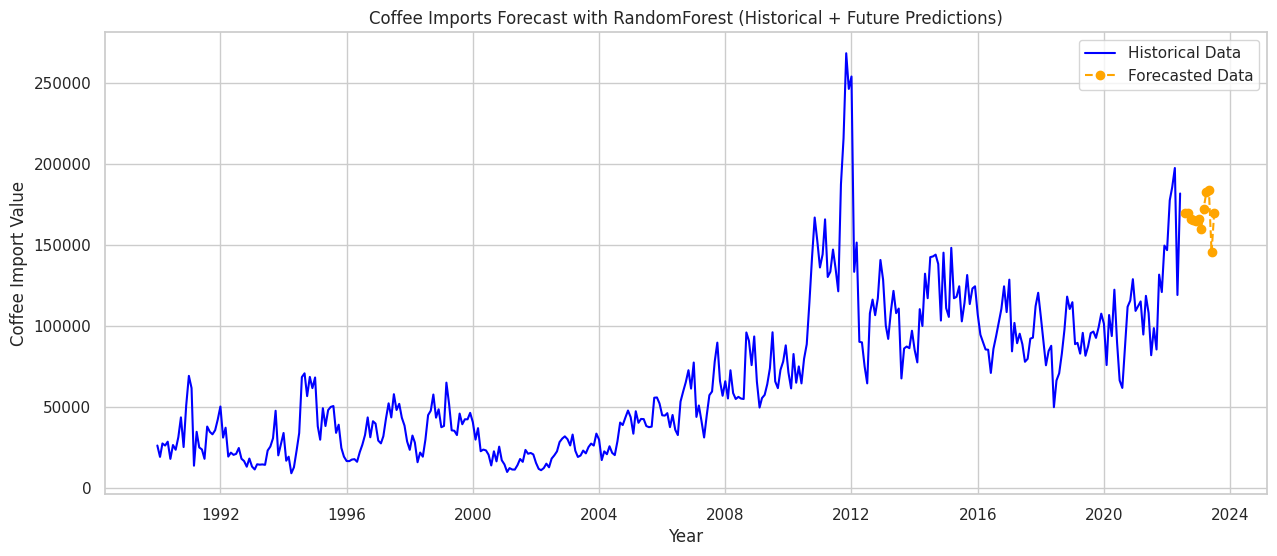

Training GradientBoosting...


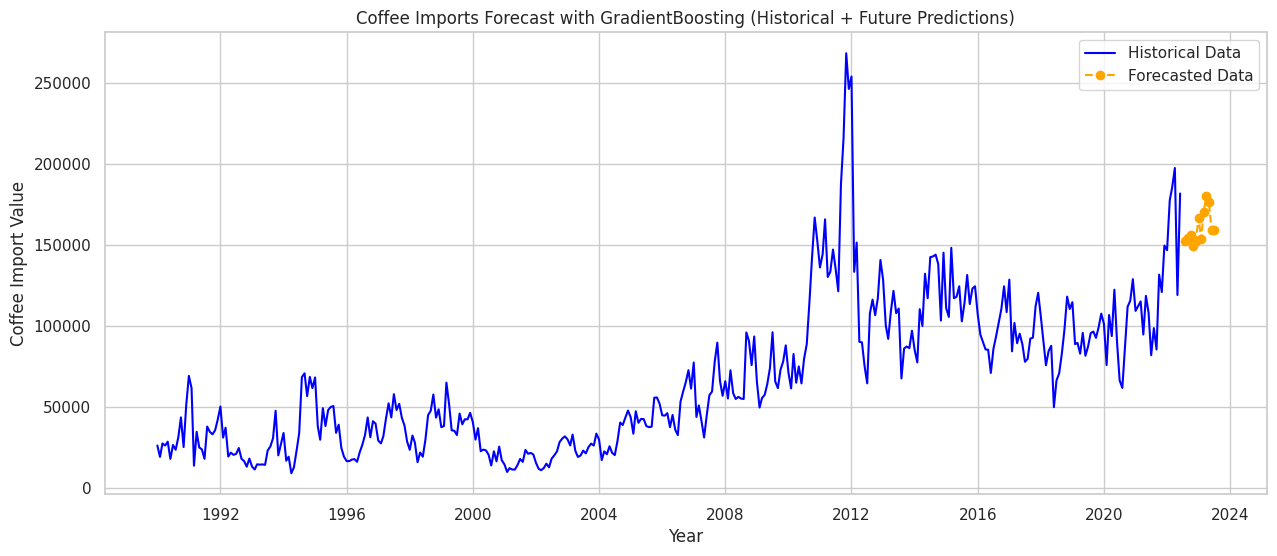

In [50]:
# Loop through each model, fit, predict, and plot the historical data and forecasted data
for model_name, model in models.items():
    print(f'Training {model_name}...')
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set (for forecasting future values)
    future_df = pd.DataFrame({
        'Month': future_dates.month,
        'Year': future_dates.year
    })
    
    # Predict the future values
    future_predictions = model.predict(future_df)
    
    # Plot historical data
    plt.figure(figsize=(15, 6))
    plt.plot(df1.index, df1['Value of Import'], label='Historical Data', color='blue')
    
    # Plot forecasted data as a line
    plt.plot(future_dates, future_predictions, label='Forecasted Data', color='orange', linestyle='--', marker='o')
    
    # Add labels and title
    plt.title(f'Coffee Imports Forecast with {model_name} (Historical + Future Predictions)')
    plt.xlabel('Year')
    plt.ylabel('Coffee Import Value')
    plt.legend()
    plt.grid(True)
    plt.show()

Training CatBoost...


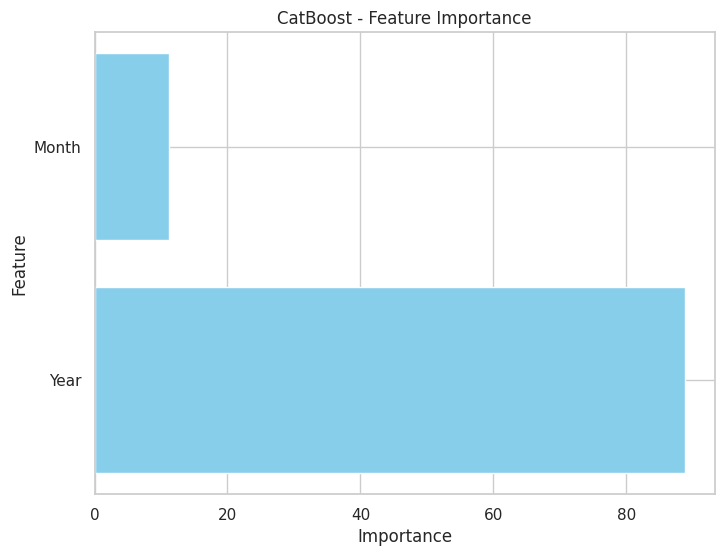

Training DecisionTree...


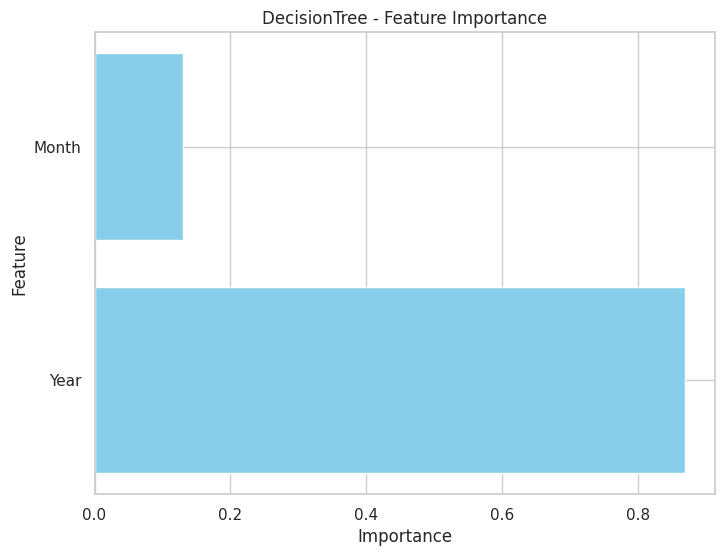

Training RandomForest...


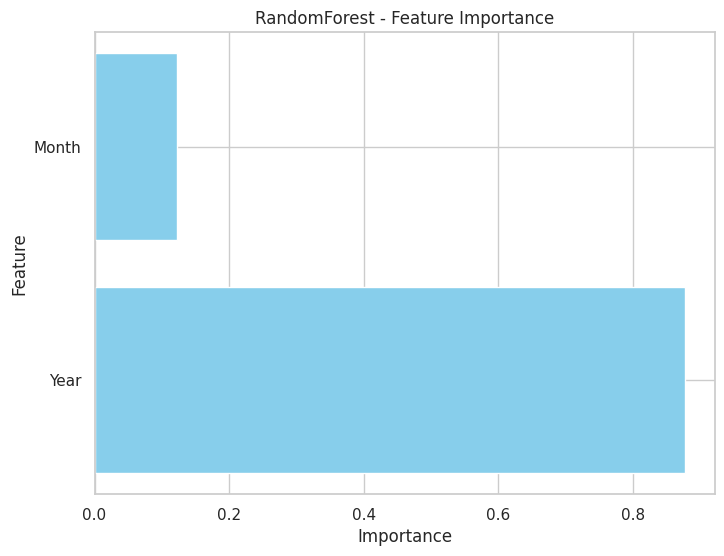

Training GradientBoosting...


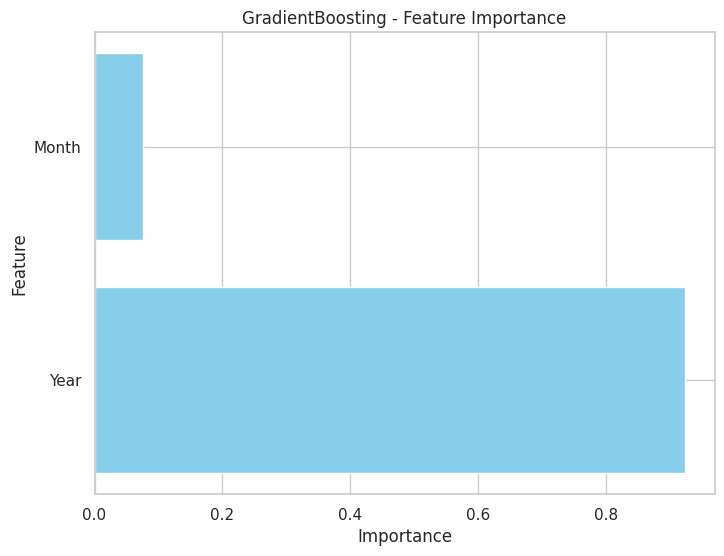

In [51]:
# Features used in the model
features = ['Month', 'Year']

# Loop through each model, fit, predict, and plot feature importance
for model_name, model in models.items():
    print(f'Training {model_name}...')
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Check if the model has the 'feature_importances_' attribute
    if hasattr(model, 'feature_importances_'):
        # Get the feature importances
        importances = model.feature_importances_
        
        # Create a DataFrame to display feature importance in descending order
        importance_df = pd.DataFrame({
            'Feature': features,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)
        
        # Plot feature importance
        plt.figure(figsize=(8, 6))
        plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
        plt.title(f'{model_name} - Feature Importance')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.grid(True)
        plt.show()
    else:
        print(f'{model_name} does not support feature importance.')

# Metrics and evaluations

In [52]:
# Dictionary to store evaluation metrics for each model
results = {}

# Loop through each model, fit, predict, and calculate metrics
for model_name, model in models.items():
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results for each model in the dictionary
    results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    }

# Convert the results dictionary into a DataFrame for easy viewing
results_df = pd.DataFrame(results).T

# Display the DataFrame with the metrics
results_df

MAE           MSE          RMSE        R²
CatBoost           9074.147476  1.585796e+08  12592.838779  0.881968
DecisionTree      12163.615385  4.086424e+08  20214.904257  0.695844
RandomForest       9438.890256  1.700869e+08  13041.736182  0.873403
GradientBoosting   8634.215053  1.454061e+08  12058.445180  0.891773

# Section B) ARIMA SARIMA time series model

# ARIMA SARIMA time series model

In [53]:
# Install necessary libraries
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.2 MB/s eta 0:00:00:00:01


In [54]:
from statsmodels.tsa.stattools import adfuller

# Step 1: Perform the ADF test
result = adfuller(df1['Value of Import'])

# Step 2: Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Values:', key, value)

# Step 3: Interpret the results
if result[1] < 0.05:
    print("The series is stationary (reject the null hypothesis of a unit root).")
else:
    print("The series is not stationary (fail to reject the null hypothesis of a unit root).")

ADF Statistic: -0.8725468110249477
p-value: 0.7968786780423138
Critical Values: 1% -3.4476763783532585
Critical Values: 5% -2.869176103659426
Critical Values: 10% -2.570837873961219
The series is not stationary (fail to reject the null hypothesis of a unit root).


ADF Statistic (differenced): -10.481175764614317
p-value (differenced): 1.212605491486323e-18
Critical Values: 1% -3.4476763783532585
Critical Values: 5% -2.869176103659426
Critical Values: 10% -2.570837873961219
The differenced series is stationary (reject the null hypothesis of a unit root).


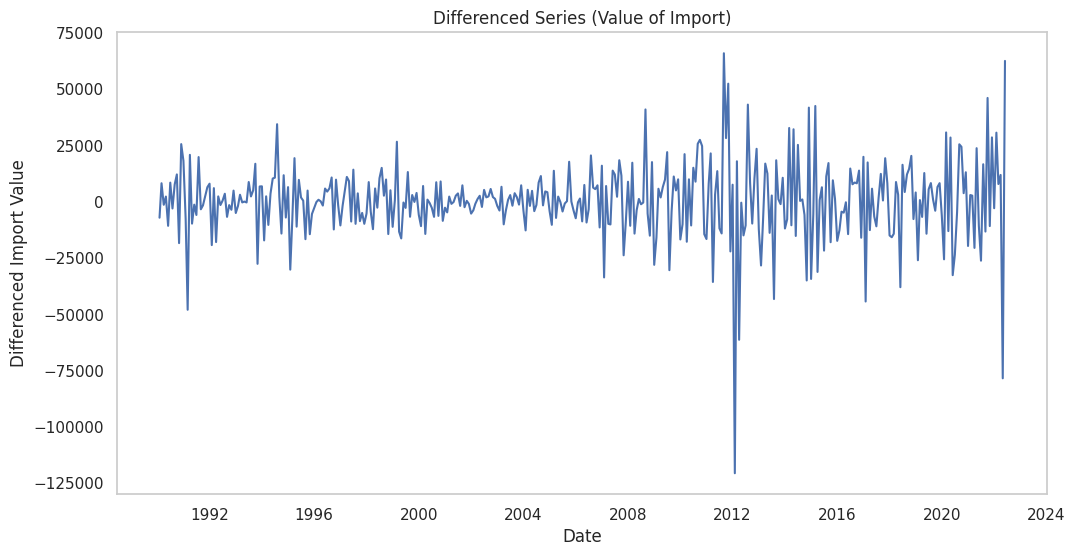

In [55]:
# Step 1: Apply first-order differencing
df_diff = df1['Value of Import'].diff().dropna()

# Step 2: Perform the ADF test on the differenced data
result_diff = adfuller(df_diff)

# Step 3: Print the test results
print('ADF Statistic (differenced):', result_diff[0])
print('p-value (differenced):', result_diff[1])
for key, value in result_diff[4].items():
    print('Critical Values:', key, value)

# Step 4: Interpret the results
if result_diff[1] < 0.05:
    print("The differenced series is stationary (reject the null hypothesis of a unit root).")
else:
    print("The differenced series is still not stationary (fail to reject the null hypothesis of a unit root).")

# Step 5: Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(df_diff)
plt.title('Differenced Series (Value of Import)')
plt.xlabel('Date')
plt.ylabel('Differenced Import Value')
plt.grid()
plt.show()

# Model time series AutoARIMA

In [56]:
import pmdarima as pm

# Model autoarima ARIMA
# Fit auto ARIMA model (this will automatically apply differencing)
auto_arima_model = pm.auto_arima(df1['Value of Import'],
                                 seasonal=True,        # Enables SARIMA if seasonality is detected
                                 m=12,                 # Seasonal period (e.g., 12 for monthly data)
                                 d=None,               # Let auto_arima decide the differencing
                                 stepwise=True,        # Stepwise search to reduce computation time
                                 suppress_warnings=True,
                                 trace=True)           # Enables detailed output of the model search

# Model autoarima SARIMA
# Fit auto ARIMA model, enabling seasonal SARIMA search
auto_sarima_model = pm.auto_arima(df1['Value of Import'],
                                  seasonal=True,        # Enables SARIMA
                                  m=12,                 # Seasonal period (e.g., 12 for monthly data)
                                  d=None,               # Automatic differencing for non-stationary data
                                  D=None,               # Automatic seasonal differencing
                                  start_p=1, start_q=1, # Initial guess for AR and MA terms
                                  max_p=3, max_q=3,     # Limits for AR and MA terms
                                  start_P=1, start_Q=1, # Initial guess for seasonal AR and MA terms
                                  max_P=2, max_Q=2,     # Limits for seasonal AR and MA terms
                                  stepwise=True,        # Stepwise search to reduce computation time
                                  suppress_warnings=True,
                                  trace=True)           # Enables detailed output of the model search

# Print the summary of the model
print(auto_sarima_model.summary())
print()
print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=8640.013, Time=1.51 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8687.350, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8649.350, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8656.698, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8685.566, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=8645.525, Time=0.89 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=8645.626, Time=0.93 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=8642.011, Time=4.23 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=8641.972, Time=3.43 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=8653.849, Time=0.42 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=8645.253, Time=2.33 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=8646.435, Time=2.11 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=3.18 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=8641.348, Time=0.90 sec
 ARIMA(2,1,1)(1,0,1)[12]

In [57]:
# Extract the best ARIMA/SARIMA parameters

# (p, d, q) for ARIMA
best_order = auto_arima_model.order
print("ARIMA",best_order)

# (P, D, Q, m) for SARIMA
best_seasonal_order = auto_arima_model.seasonal_order  
print("SARIMA",best_seasonal_order)

ARIMA (3, 1, 2)
SARIMA (1, 0, 1, 12)


# Model ARIMA

In [58]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model with the non-seasonal (p, d, q) parameters
arima_model = ARIMA(df1['Value of Import'], order=best_order)
arima_result = arima_model.fit()

# Print ARIMA model summary
print(arima_result.summary())

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:        Value of Import   No. Observations:                  390
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -4308.386
Date:                Thu, 10 Oct 2024   AIC                           8628.772
Time:                        08:50:26   BIC                           8652.554
Sample:                    01-01-1990   HQIC                          8638.200
                         - 06-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2601      0.068     18.487      0.000       1.127       1.394
ar.L2         -0.2093      0.080     -2.609      0.009      -0.367      -0.052
ar.L3         -0.3570      0.041     -8.710      0.0

# Model time series SARIMA

In [59]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model with both seasonal and non-seasonal parameters
sarima_model = SARIMAX(df1['Value of Import'],
                       order=best_order,               # (p, d, q)
                       seasonal_order=best_seasonal_order)  # (P, D, Q, m)

sarima_result = sarima_model.fit()

# Print SARIMA model summary
print(sarima_result.summary())

RUNNING THE L-BFGS-B CODE


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11194D+01    |proj g|=  2.93298D-01

At iterate    5    f=  1.10718D+01    |proj g|=  1.52969D-02

At iterate   10    f=  1.10479D+01    |proj g|=  6.41056D-02

At iterate   15    f=  1.10347D+01    |proj g|=  3.33495D-02

At iterate   20    f=  1.10303D+01    |proj g|=  6.53557D-03

At iterate   25    f=  1.10286D+01    |proj g|=  4.00093D-03

At iterate   30    f=  1.10273D+01    |proj g|=  2.08052D-03

At iterate   35    f=  1.10273D+01    |proj g|=  2.05372D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

 

# Forecast

In [60]:
# Set the forecast horizon (e.g., next 12 months)
n_periods = 35
arima_forecast = arima_result.get_forecast(steps=n_periods)
arima_conf_int = arima_forecast.conf_int()

# Create a time index for the forecast
arima_forecast_index = pd.date_range(df1.index[-1], periods=n_periods + 1, freq='M')[1:]
arima_forecast_index

DatetimeIndex(['2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31',
               '2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28',
               '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30',
               '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31',
               '2023-11-30', '2023-12-31', '2024-01-31', '2024-02-29',
               '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30',
               '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
               '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28',
               '2025-03-31', '2025-04-30', '2025-05-31'],
              dtype='datetime64[ns]', freq='ME')

In [61]:
# Forecast with SARIMA model (next 12 months)
sarima_forecast = sarima_result.get_forecast(steps=n_periods)
sarima_conf_int = sarima_forecast.conf_int()

# Create a time index for the SARIMA forecast
sarima_forecast_index = pd.date_range(df1.index[-1], periods=n_periods + 1, freq='M')[1:]
sarima_forecast_index

DatetimeIndex(['2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31',
               '2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28',
               '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30',
               '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31',
               '2023-11-30', '2023-12-31', '2024-01-31', '2024-02-29',
               '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30',
               '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
               '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28',
               '2025-03-31', '2025-04-30', '2025-05-31'],
              dtype='datetime64[ns]', freq='ME')

# Plot forecast ARIMA

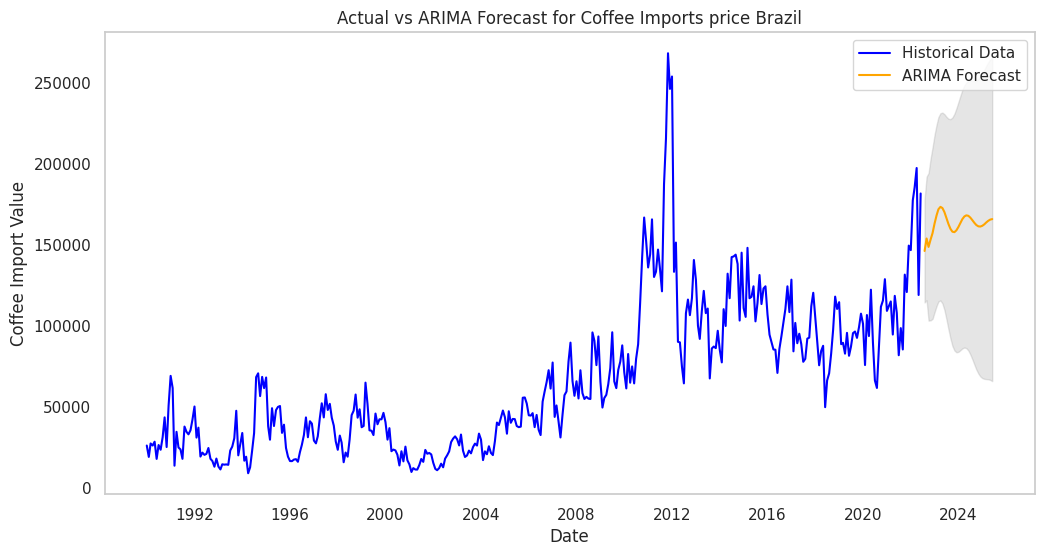

In [62]:
# Plot ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['Value of Import'], label='Historical Data', color='blue')
plt.plot(arima_forecast_index, arima_forecast.predicted_mean, label='ARIMA Forecast', color='orange')

# Plot the confidence intervals
plt.fill_between(arima_forecast_index, arima_conf_int.iloc[:, 0], arima_conf_int.iloc[:, 1], color='gray', alpha=0.2)

# Add labels and title
plt.title('Actual vs ARIMA Forecast for Coffee Imports price Brazil')
plt.xlabel('Date')
plt.ylabel('Coffee Import Value')
plt.legend()
plt.grid(False)
plt.show()

# Plot forecast SARIMA

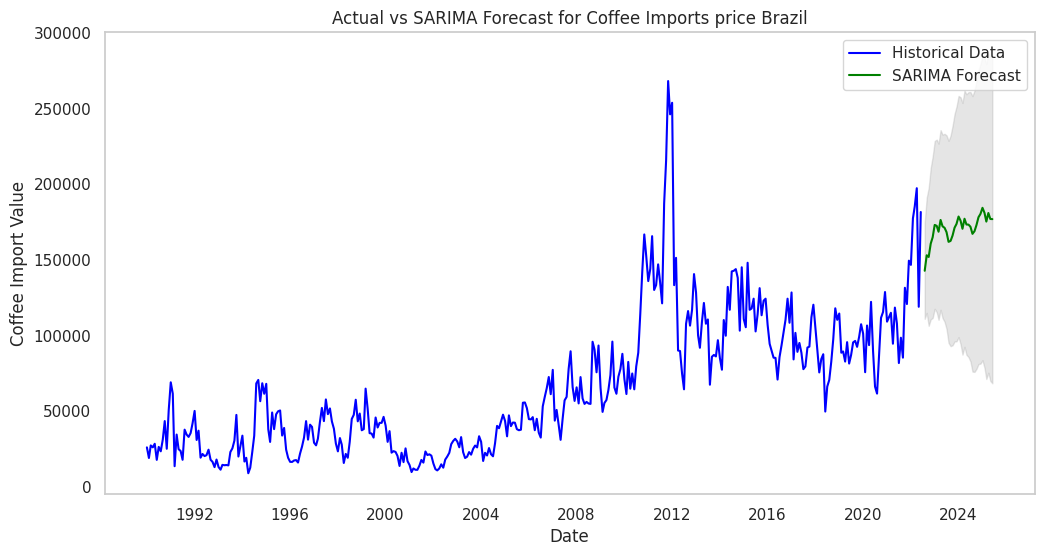

In [63]:
# Plot SARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['Value of Import'], label='Historical Data', color='blue')
plt.plot(sarima_forecast_index, sarima_forecast.predicted_mean, label='SARIMA Forecast', color='green')

# Plot the confidence intervals
plt.fill_between(sarima_forecast_index, sarima_conf_int.iloc[:, 0], sarima_conf_int.iloc[:, 1], color='gray', alpha=0.2)

# Add labels and title
plt.title('Actual vs SARIMA Forecast for Coffee Imports price Brazil')
plt.xlabel('Date')
plt.ylabel('Coffee Import Value')
plt.legend()
plt.grid(False)
plt.show()

# ARIMA SARIMA model metrics

In [64]:
# Forecast for the test period (same number of steps as the actual data)
n_periods = len(y_test)  # y_test is the actual values of the test period

# ARIMA Predictions
arima_forecast = arima_result.forecast(steps=n_periods)

# SARIMA Predictions
sarima_forecast = sarima_result.forecast(steps=n_periods)

In [65]:
# Calculate RMSE, MAE, MSE, and R2 for ARIMA
arima_rmse = np.sqrt(mean_squared_error(y_test, arima_forecast))
arima_mae = mean_absolute_error(y_test, arima_forecast)
arima_mse = mean_squared_error(y_test, arima_forecast)
arima_r2 = r2_score(y_test, arima_forecast)

# Calculate RMSE, MAE, MSE, and R2 for SARIMA
sarima_rmse = np.sqrt(mean_squared_error(y_test, sarima_forecast))
sarima_mae = mean_absolute_error(y_test, sarima_forecast)
sarima_mse = mean_squared_error(y_test, sarima_forecast)
sarima_r2 = r2_score(y_test, sarima_forecast)

arima_metrics = {'Model': 'ARIMA',
                 'RMSE': arima_rmse, 
                 'MAE': arima_mae,
                 'MSE': arima_mse,
                 'R2': arima_r2}

sarima_metrics = {'Model': 'SARIMA',
                  'RMSE': sarima_rmse,
                  'MAE': sarima_mae,
                  'MSE': sarima_mse,
                  'R2': sarima_r2}

# Create a DataFrame with both ARIMA and SARIMA metrics
metrics_df = pd.DataFrame([arima_metrics, sarima_metrics])
metrics_df

Model           RMSE            MAE           MSE         R2
0   ARIMA  111340.238456  105031.084522  1.239665e+10  -8.226923
1  SARIMA  126675.548869  120793.669240  1.604669e+10 -10.943681